In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings  
warnings.filterwarnings('ignore')

In [2]:
df_v2 = pd.DataFrame(pd.read_csv("data/train.csv"))
df_test=pd.DataFrame(pd.read_csv("data/test.csv"))

In [3]:
targets = ['CPULOAD']
features = [feature for feature in df_v2.columns if feature not in targets]
df_v2.head()

DATETIME     SERVER     CPU  CPULOAD
0  2020-03-24 00:00:00+03:00  CIHAZ_301   CPU-0     3.88
1  2020-03-24 00:00:00+03:00  CIHAZ_301   CPU-1    11.33
2  2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-10     5.31
3  2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-11     5.25
4  2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-12     0.28

In [4]:
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'], format='%Y-%m-%d %H:%M:%S%z')
df_v2.head()

DATETIME     SERVER     CPU  CPULOAD
0 2020-03-24 00:00:00+03:00  CIHAZ_301   CPU-0     3.88
1 2020-03-24 00:00:00+03:00  CIHAZ_301   CPU-1    11.33
2 2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-10     5.31
3 2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-11     5.25
4 2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-12     0.28

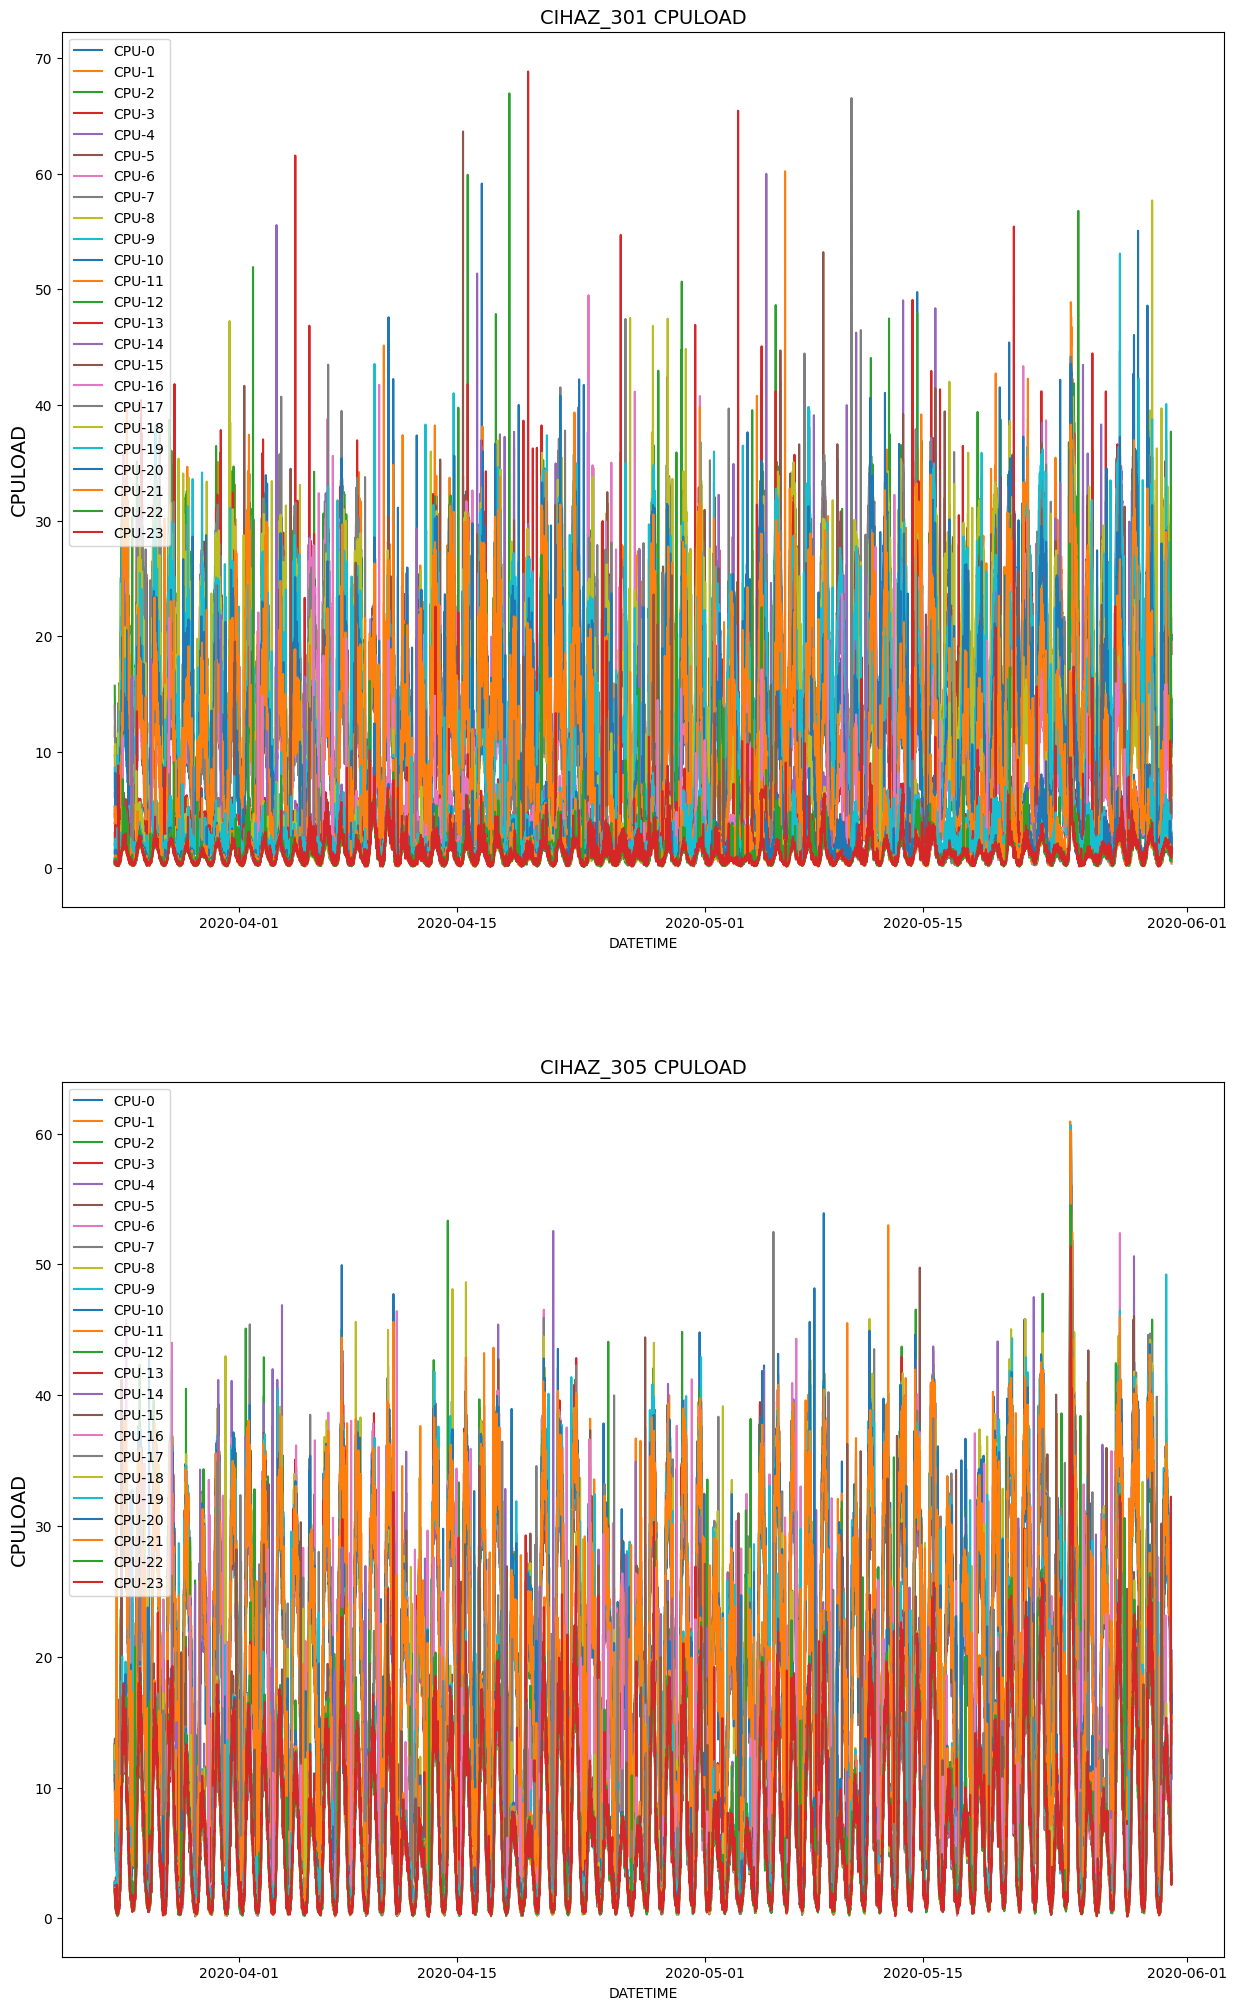

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri okuma
df_v2 = pd.read_csv('data/train.csv')

# Veri zaman serisine çevirme
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])
df_v2 = df_v2.set_index('DATETIME')

# Veriyi cihaz ve CPU'lara göre ayırma
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# CPU'ları ayırma
df_cihaz301_CPUs = [df_cihaz301[df_cihaz301['CPU'] == f'CPU-{i}'] for i in range(24)]
df_cihaz305_CPUs = [df_cihaz305[df_cihaz305['CPU'] == f'CPU-{i}'] for i in range(24)]

# Grafikleri çizme
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 25))

for i in range(24):
    sns.lineplot(x=df_cihaz301_CPUs[i].index, y=df_cihaz301_CPUs[i]['CPULOAD'].fillna(np.inf), ax=ax[0], label=f'CPU-{i}')
    sns.lineplot(x=df_cihaz305_CPUs[i].index, y=df_cihaz305_CPUs[i]['CPULOAD'].fillna(np.inf), ax=ax[1], label=f'CPU-{i}')

ax[0].set_title('CIHAZ_301 CPULOAD', fontsize=14)
ax[0].set_ylabel(ylabel='CPULOAD', fontsize=14)
ax[1].set_title('CIHAZ_305 CPULOAD', fontsize=14)
ax[1].set_ylabel(ylabel='CPULOAD', fontsize=14)

plt.show()


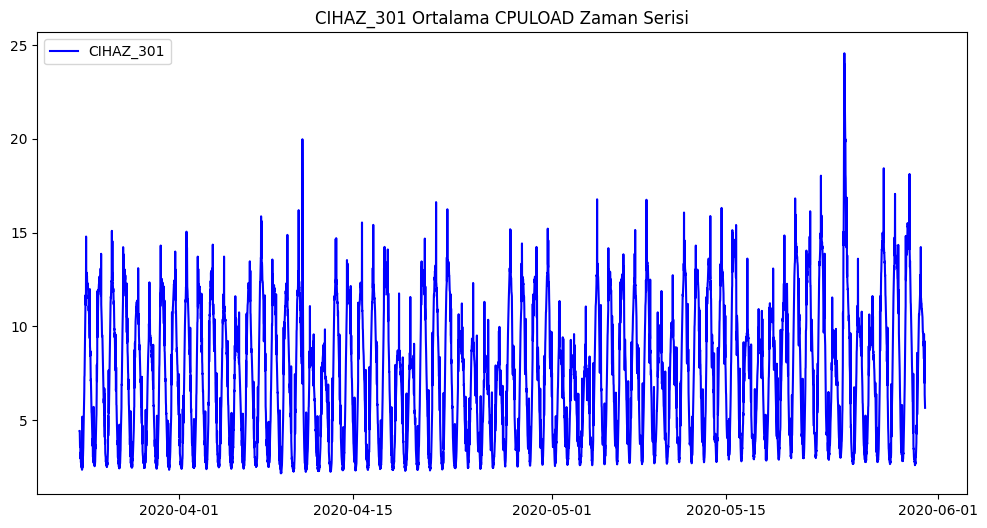

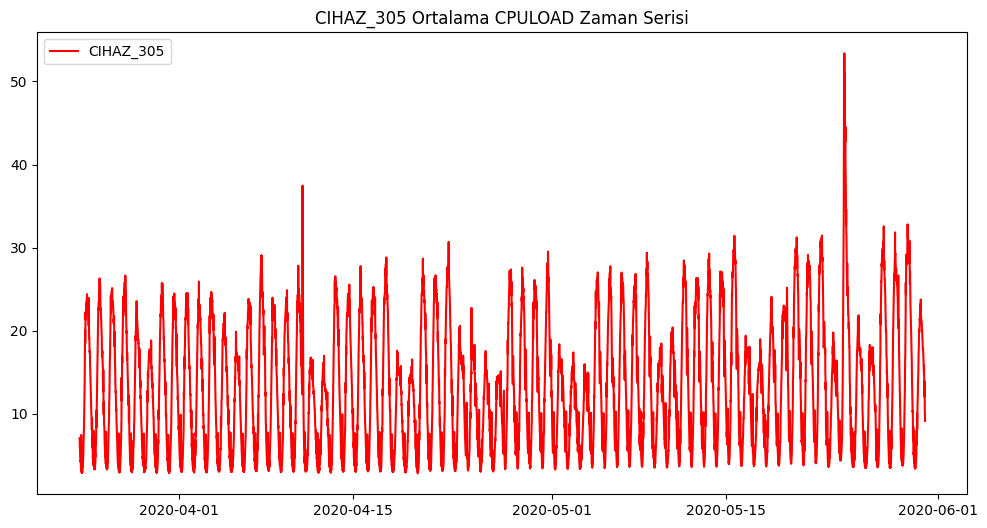

In [8]:
# Veriyi oku ve işle
df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])

# SERVER ve DATETIME'a göre grupla ve CPULOAD değerlerinin ortalamasını al
df_avg = df_v2.groupby(['SERVER', 'DATETIME'])['CPULOAD'].mean().reset_index()

# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301_avg = df_avg[df_avg['SERVER'] == 'CIHAZ_301']
df_cihaz305_avg = df_avg[df_avg['SERVER'] == 'CIHAZ_305']

# CIHAZ_301 için zaman serisini çiz
plt.figure(figsize=(12,6))
plt.plot(df_cihaz301_avg['DATETIME'], df_cihaz301_avg['CPULOAD'], color='blue', label='CIHAZ_301')
plt.title('CIHAZ_301 Ortalama CPULOAD Zaman Serisi')
plt.legend()
plt.show()

# CIHAZ_305 için zaman serisini çiz
plt.figure(figsize=(12,6))
plt.plot(df_cihaz305_avg['DATETIME'], df_cihaz305_avg['CPULOAD'], color='red', label='CIHAZ_305')
plt.title('CIHAZ_305 Ortalama CPULOAD Zaman Serisi')
plt.legend()
plt.show()


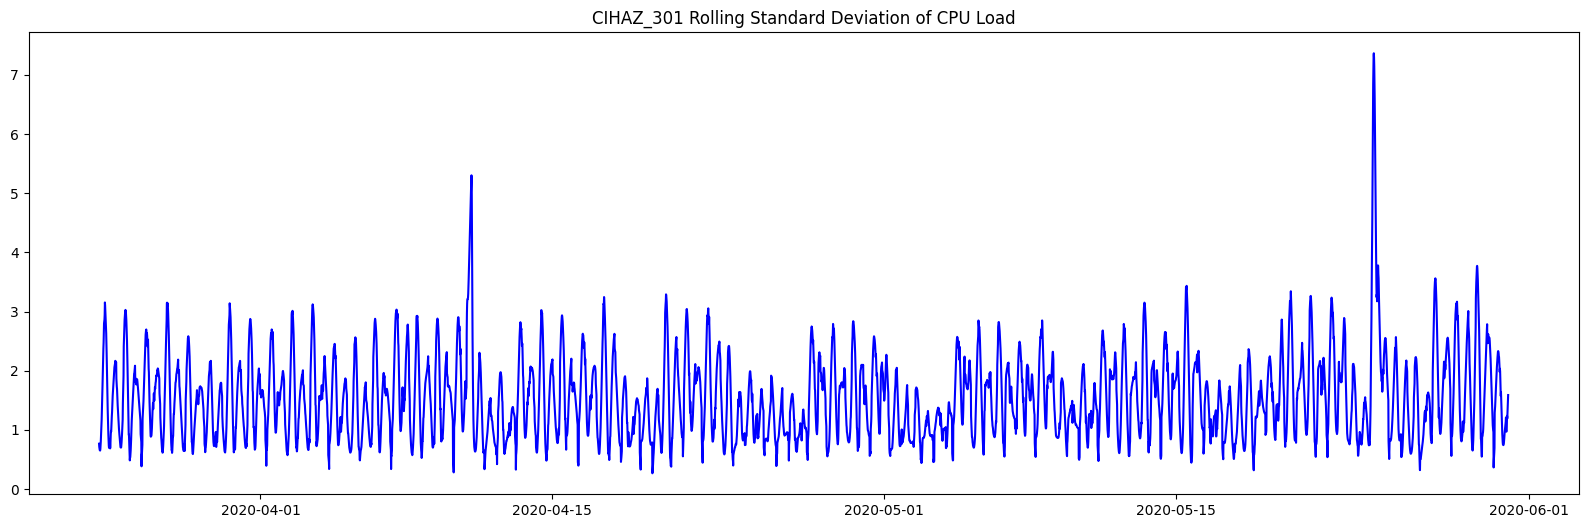

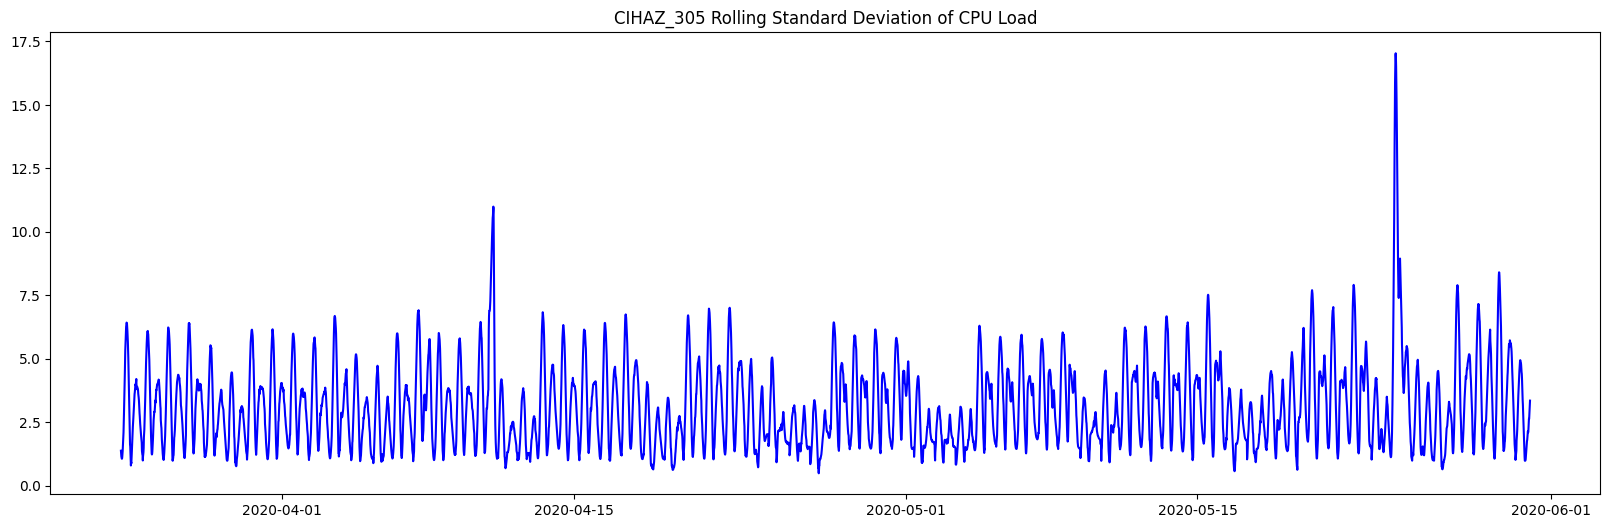

In [9]:
# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# Belirli bir pencere boyutu seçin (örneğin, 24 saat)
window_size = 24

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların ortalama değerlerini hesapla
avg_cihaz301 = df_cihaz301.groupby('DATETIME')['CPULOAD'].mean()
avg_cihaz305 = df_cihaz305.groupby('DATETIME')['CPULOAD'].mean()

# Hareketli standart sapmayı hesapla
rolstd_cihaz301 = avg_cihaz301.rolling(window=window_size).std()
rolstd_cihaz305 = avg_cihaz305.rolling(window=window_size).std()

# CIHAZ_301 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(rolstd_cihaz301, color='blue')
plt.title('CIHAZ_301 Rolling Standard Deviation of CPU Load')
plt.show()

# CIHAZ_305 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(rolstd_cihaz305, color='blue')
plt.title('CIHAZ_305 Rolling Standard Deviation of CPU Load')
plt.show()


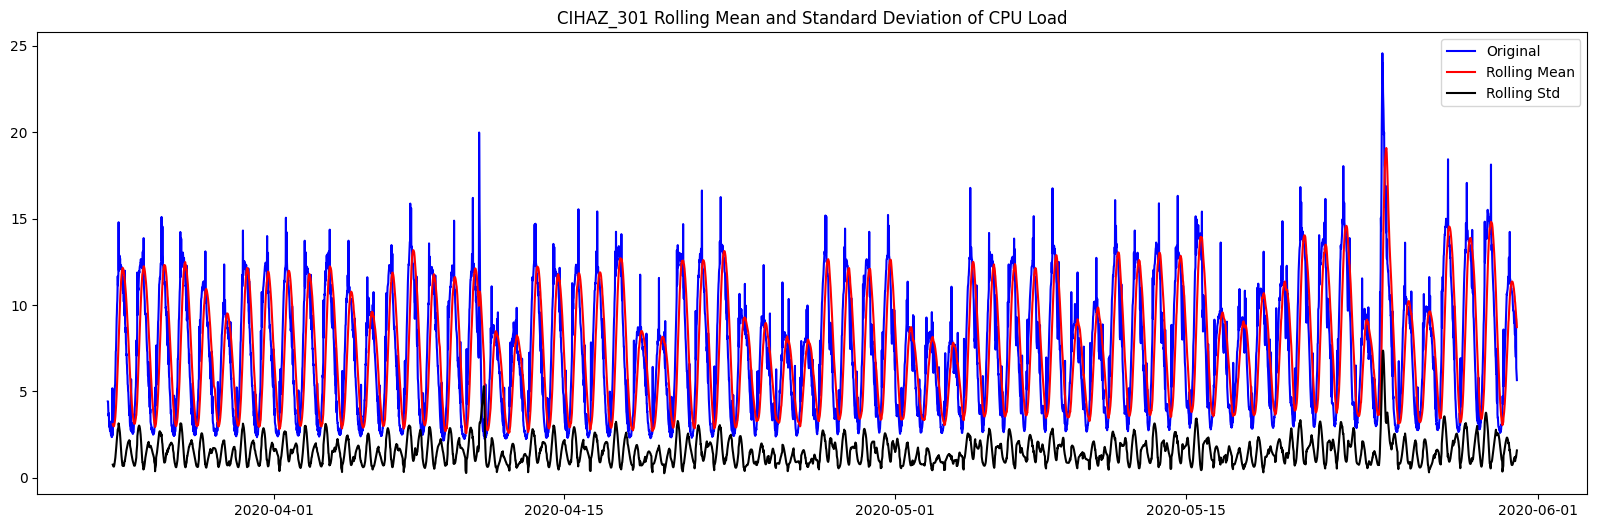

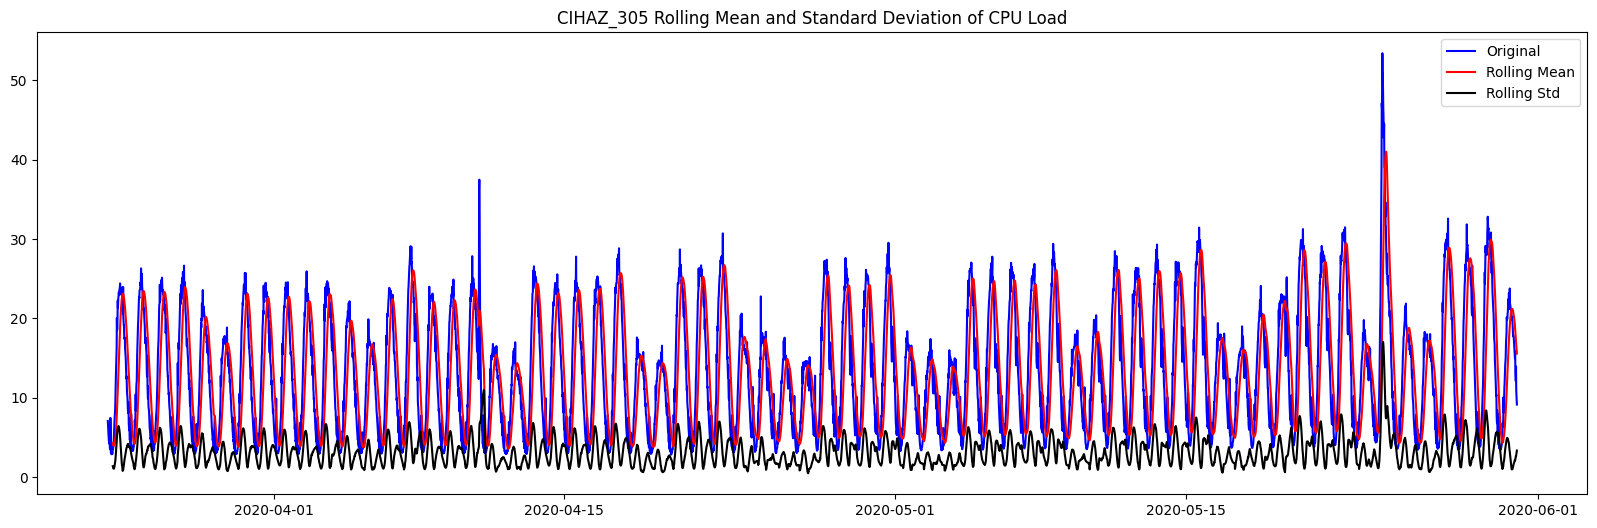

In [10]:
# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# Belirli bir pencere boyutu seçin (örneğin, 24 saat)
window_size = 24

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların değerlerini grupla ve ortalama al
avg_cpu_cihaz301 = df_cihaz301.groupby('DATETIME')['CPULOAD'].mean()
avg_cpu_cihaz305 = df_cihaz305.groupby('DATETIME')['CPULOAD'].mean()

# Hareketli ortalamayı ve standart sapmayı hesapla
rolmean_cihaz301 = avg_cpu_cihaz301.rolling(window=window_size).mean()
rolstd_cihaz301 = avg_cpu_cihaz301.rolling(window=window_size).std()

rolmean_cihaz305 = avg_cpu_cihaz305.rolling(window=window_size).mean()
rolstd_cihaz305 = avg_cpu_cihaz305.rolling(window=window_size).std()

# CIHAZ_301 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(avg_cpu_cihaz301, color='blue', label='Original')
plt.plot(rolmean_cihaz301, color='red', label='Rolling Mean')
plt.plot(rolstd_cihaz301, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('CIHAZ_301 Rolling Mean and Standard Deviation of CPU Load')
plt.show()

# CIHAZ_305 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(avg_cpu_cihaz305, color='blue', label='Original')
plt.plot(rolmean_cihaz305, color='red', label='Rolling Mean')
plt.plot(rolstd_cihaz305, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('CIHAZ_305 Rolling Mean and Standard Deviation of CPU Load')
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların değerlerini grupla ve ortalama al
avg_cpu_cihaz301 = df_cihaz301.groupby(['DATETIME'])['CPULOAD'].mean().reset_index()
avg_cpu_cihaz305 = df_cihaz305.groupby(['DATETIME'])['CPULOAD'].mean().reset_index()

# CIHAZ_301 ve CIHAZ_305 için ADF testini gerçekleştir
result_cihaz301 = adfuller(avg_cpu_cihaz301['CPULOAD'].values)
result_cihaz305 = adfuller(avg_cpu_cihaz305['CPULOAD'].values)

print("CIHAZ_301")
print(f"ADF Statistic: {result_cihaz301[0]}")
print(f"p-value: {result_cihaz301[1]}")
print(f"Critical Value (1%): {result_cihaz301[4]['1%']}")
print(f"Critical Value (5%): {result_cihaz301[4]['5%']}")
print(f"Critical Value (10%): {result_cihaz301[4]['10%']}")
print("-" * 50)

print("CIHAZ_305")
print(f"ADF Statistic: {result_cihaz305[0]}")
print(f"p-value: {result_cihaz305[1]}")
print(f"Critical Value (1%): {result_cihaz305[4]['1%']}")
print(f"Critical Value (5%): {result_cihaz305[4]['5%']}")
print(f"Critical Value (10%): {result_cihaz305[4]['10%']}")
print("-" * 50)


CIHAZ_301
ADF Statistic: -18.64169068699347
p-value: 2.053849745991242e-30
Critical Value (1%): -3.4313597071653335
Critical Value (5%): -2.861986203804562
Critical Value (10%): -2.5670075109669024
--------------------------------------------------
CIHAZ_305
ADF Statistic: -17.771059425170673
p-value: 3.3073535396207276e-30
Critical Value (1%): -3.4313598630942765
Critical Value (5%): -2.861986272700051
Critical Value (10%): -2.567007547641477
--------------------------------------------------


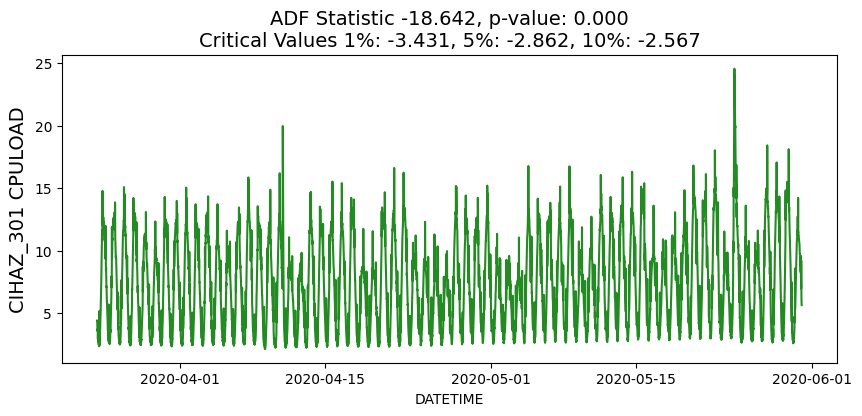

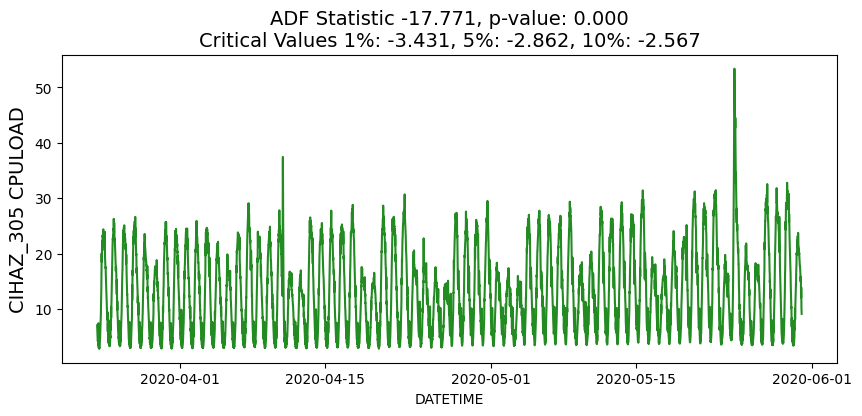

In [14]:
def visualize_adfuller_results(series, title):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=series.index, y=series, color=linecolor)
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=title, fontsize=14)
    plt.show()

# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların değerlerini grupla ve ortalama al
avg_cpu_cihaz301 = df_cihaz301.groupby(['DATETIME'])['CPULOAD'].mean()
avg_cpu_cihaz305 = df_cihaz305.groupby(['DATETIME'])['CPULOAD'].mean()

# CIHAZ_301 ve CIHAZ_305 için ADF testini gerçekleştir
visualize_adfuller_results(avg_cpu_cihaz301, 'CIHAZ_301 CPULOAD')
visualize_adfuller_results(avg_cpu_cihaz305, 'CIHAZ_305 CPULOAD')


In [15]:
df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])

df_v2['year'] = df_v2['DATETIME'].dt.year
df_v2['month'] = df_v2['DATETIME'].dt.month
df_v2['day'] = df_v2['DATETIME'].dt.day
df_v2['day_of_year'] = df_v2['DATETIME'].dt.dayofyear
df_v2['week_of_year'] = df_v2['DATETIME'].dt.isocalendar().week
df_v2['quarter'] = df_v2['DATETIME'].dt.quarter
df_v2['season'] = df_v2['month'] % 12 // 3 + 1

df_v2[['DATETIME', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()


DATETIME  year  month  day  day_of_year  week_of_year   
0 2020-03-24 00:00:00+03:00  2020      3   24           84            13  \
1 2020-03-24 00:00:00+03:00  2020      3   24           84            13   
2 2020-03-24 00:00:00+03:00  2020      3   24           84            13   
3 2020-03-24 00:00:00+03:00  2020      3   24           84            13   
4 2020-03-24 00:00:00+03:00  2020      3   24           84            13   

   quarter  season  
0        1       2  
1        1       2  
2        1       2  
3        1       2  
4        1       2

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])
df_v2 = df_v2.set_index('DATETIME')

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

df_results = pd.DataFrame()

for i in range(24):
    df_cpu_cihaz301 = df_cihaz301[df_cihaz301['CPU'] == f'CPU-{i}'].copy()
    df_cpu_cihaz305 = df_cihaz305[df_cihaz305['CPU'] == f'CPU-{i}'].copy()

    avg_cpu_cihaz301 = df_cpu_cihaz301.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean()
    avg_cpu_cihaz305 = df_cpu_cihaz305.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean()

    avg_cpu_cihaz301 = avg_cpu_cihaz301.interpolate()
    avg_cpu_cihaz305 = avg_cpu_cihaz305.interpolate()

    decomp_cihaz301 = seasonal_decompose(avg_cpu_cihaz301, period=52, model='additive', extrapolate_trend='freq')
    df_cpu_cihaz301[f"CPULOAD_trend"] = decomp_cihaz301.trend
    df_cpu_cihaz301[f"CPULOAD_seasonal"] = decomp_cihaz301.seasonal

    decomp_cihaz305 = seasonal_decompose(avg_cpu_cihaz305, period=52, model='additive', extrapolate_trend='freq')
    df_cpu_cihaz305[f"CPULOAD_trend"] = decomp_cihaz305.trend
    df_cpu_cihaz305[f"CPULOAD_seasonal"] = decomp_cihaz305.seasonal

    df_results = pd.concat([df_results, df_cpu_cihaz301, df_cpu_cihaz305])

df_results.head()


SERVER    CPU  CPULOAD  CPULOAD_trend   
DATETIME                                                              
2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-0     3.88       4.073698  \
2020-03-24 00:15:00+03:00  CIHAZ_301  CPU-0     3.92       4.197947   
2020-03-24 00:30:00+03:00  CIHAZ_301  CPU-0     3.62       4.322197   
2020-03-24 00:45:00+03:00  CIHAZ_301  CPU-0     3.07       4.446446   
2020-03-24 01:00:00+03:00  CIHAZ_301  CPU-0     3.11       4.570696   

                           CPULOAD_seasonal  
DATETIME                                     
2020-03-24 00:00:00+03:00         -0.020915  
2020-03-24 00:15:00+03:00          0.349345  
2020-03-24 00:30:00+03:00          0.087600  
2020-03-24 00:45:00+03:00          0.047912  
2020-03-24 01:00:00+03:00          0.092475

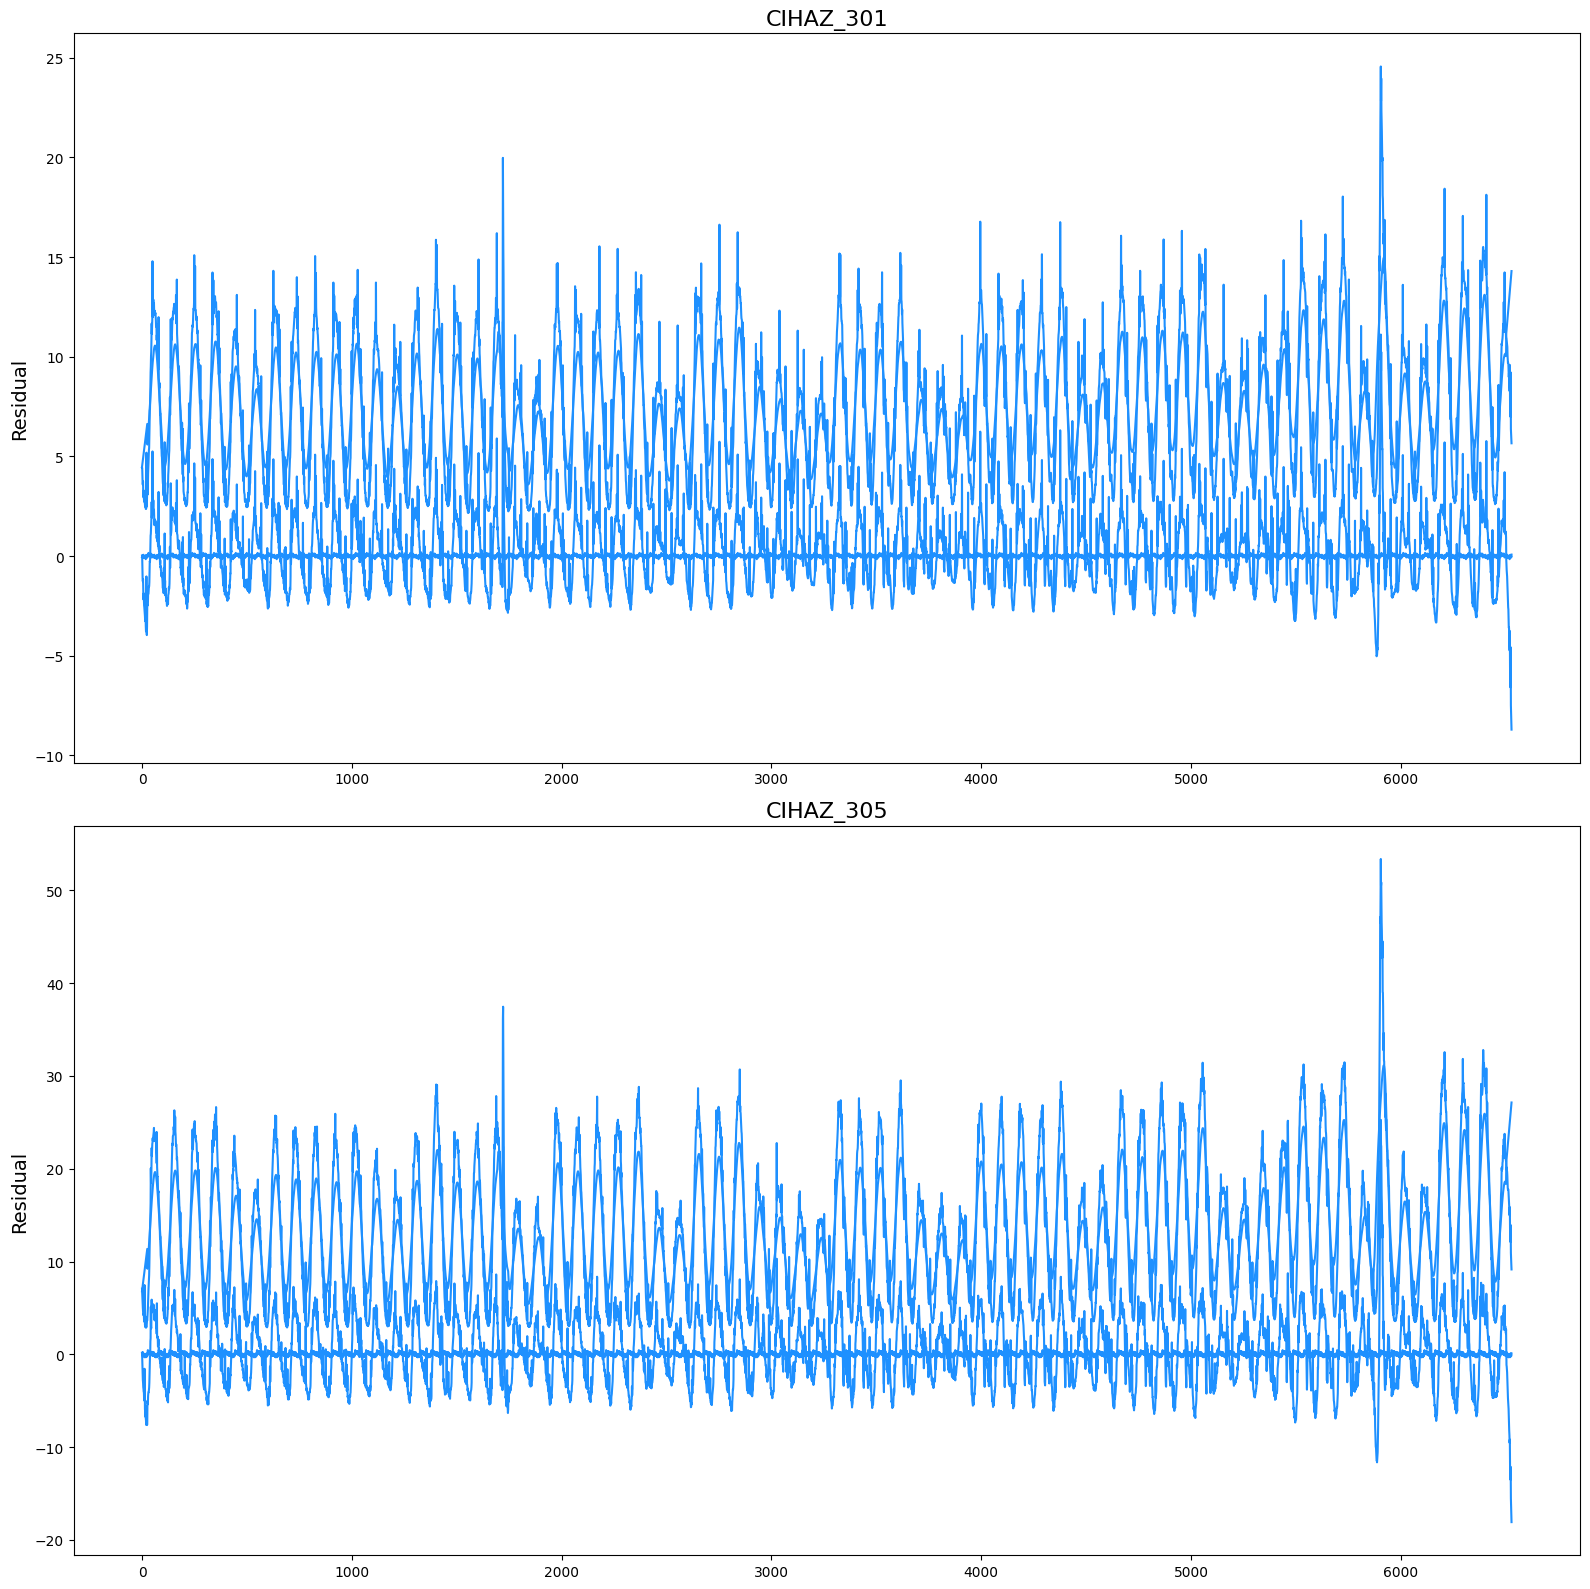

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

avg_cpu_cihaz301 = df_cihaz301.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()
avg_cpu_cihaz305 = df_cihaz305.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()

avg_cpu_cihaz301['CPULOAD'] = avg_cpu_cihaz301['CPULOAD'].interpolate()
avg_cpu_cihaz305['CPULOAD'] = avg_cpu_cihaz305['CPULOAD'].interpolate()

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

axs[0].set_title('CIHAZ_301', fontsize=16)
res_cihaz301 = seasonal_decompose(avg_cpu_cihaz301['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz301.observed.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Observed', fontsize=14)
res_cihaz301.trend.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Trend', fontsize=14)
res_cihaz301.seasonal.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Seasonal', fontsize=14)
res_cihaz301.resid.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Residual', fontsize=14)

axs[1].set_title('CIHAZ_305', fontsize=16)
res_cihaz305 = seasonal_decompose(avg_cpu_cihaz305['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz305.observed.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Observed', fontsize=14)
res_cihaz305.trend.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Trend', fontsize=14)
res_cihaz305.seasonal.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Seasonal', fontsize=14)
res_cihaz305.resid.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()


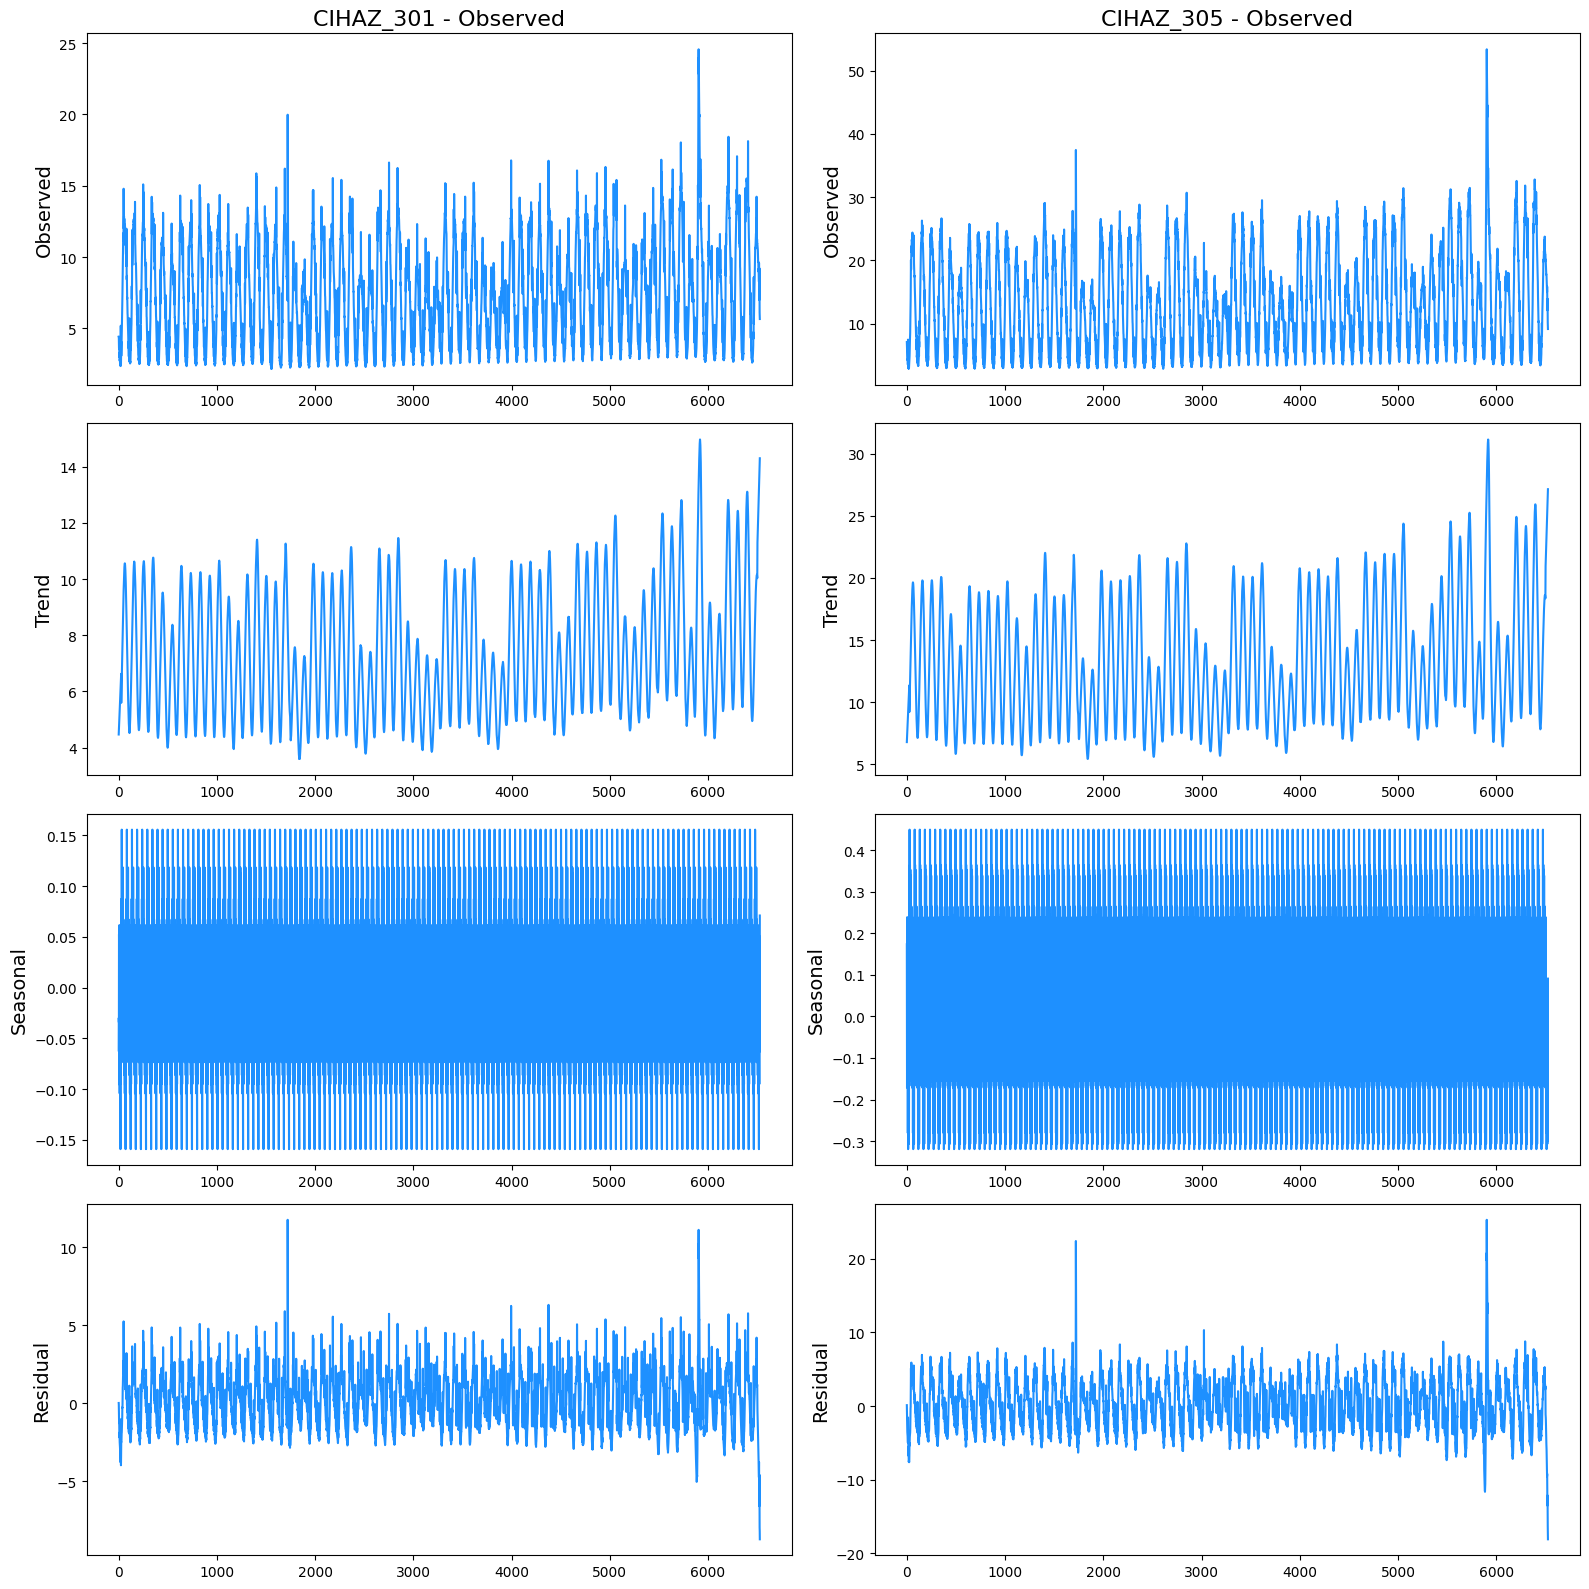

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

avg_cpu_cihaz301 = df_cihaz301.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()
avg_cpu_cihaz305 = df_cihaz305.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()

avg_cpu_cihaz301['CPULOAD'] = avg_cpu_cihaz301['CPULOAD'].interpolate()
avg_cpu_cihaz305['CPULOAD'] = avg_cpu_cihaz305['CPULOAD'].interpolate()

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

axs[0, 0].set_title('CIHAZ_301 - Observed', fontsize=16)
res_cihaz301 = seasonal_decompose(avg_cpu_cihaz301['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz301.observed.plot(ax=axs[0, 0], legend=False, color='dodgerblue')
axs[0, 0].set_ylabel('Observed', fontsize=14)

res_cihaz301.trend.plot(ax=axs[1, 0], legend=False, color='dodgerblue')
axs[1, 0].set_ylabel('Trend', fontsize=14)

res_cihaz301.seasonal.plot(ax=axs[2, 0], legend=False, color='dodgerblue')
axs[2, 0].set_ylabel('Seasonal', fontsize=14)

res_cihaz301.resid.plot(ax=axs[3, 0], legend=False, color='dodgerblue')
axs[3, 0].set_ylabel('Residual', fontsize=14)

axs[0, 1].set_title('CIHAZ_305 - Observed', fontsize=16)
res_cihaz305 = seasonal_decompose(avg_cpu_cihaz305['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz305.observed.plot(ax=axs[0, 1], legend=False, color='dodgerblue')
axs[0, 1].set_ylabel('Observed', fontsize=14)

res_cihaz305.trend.plot(ax=axs[1, 1], legend=False, color='dodgerblue')
axs[1, 1].set_ylabel('Trend', fontsize=14)

res_cihaz305.seasonal.plot(ax=axs[2, 1], legend=False, color='dodgerblue')
axs[2, 1].set_ylabel('Seasonal', fontsize=14)

res_cihaz305.resid.plot(ax=axs[3, 1], legend=False, color='dodgerblue')
axs[3, 1].set_ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()


In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])
df_v2 = df_v2.set_index('DATETIME')

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

df_avg_cihaz301 = df_cihaz301.groupby(['SERVER', 'CPU', pd.Grouper(freq='15Min')]).mean().reset_index()
df_avg_cihaz305 = df_cihaz305.groupby(['SERVER', 'CPU', pd.Grouper(freq='15Min')]).mean().reset_index()

df_results = pd.DataFrame()

for i in range(24):
    avg_cpu_cihaz301 = df_avg_cihaz301[df_avg_cihaz301['CPU'] == f'CPU-{i}']['CPULOAD']
    avg_cpu_cihaz305 = df_avg_cihaz305[df_avg_cihaz305['CPU'] == f'CPU-{i}']['CPULOAD']
    
    decomp_cihaz301 = seasonal_decompose(avg_cpu_cihaz301, period=52, model='additive', extrapolate_trend='freq')
    df_avg_cihaz301[f"CPULOAD_trend_CPU-{i}"] = decomp_cihaz301.trend
    df_avg_cihaz301[f"CPULOAD_seasonal_CPU-{i}"] = decomp_cihaz301.seasonal

    decomp_cihaz305 = seasonal_decompose(avg_cpu_cihaz305, period=52, model='additive', extrapolate_trend='freq')
    df_avg_cihaz305[f"CPULOAD_trend_CPU-{i}"] = decomp_cihaz305.trend
    df_avg_cihaz305[f"CPULOAD_seasonal_CPU-{i}"] = decomp_cihaz305.seasonal

df_results = pd.concat([df_avg_cihaz301, df_avg_cihaz305])

# Sonuçları görüntüle
df_results[['SERVER', 'CPU', 'CPULOAD', 'CPULOAD_trend_CPU-0', 'CPULOAD_seasonal_CPU-0']].head().style.set_properties(subset=['CPULOAD_trend_CPU-0', 'CPULOAD_seasonal_CPU-0'], **{'background-color': 'dodgerblue'})


In [35]:
df_v2.head()

SERVER     CPU  CPULOAD
DATETIME                                             
2020-03-24 00:00:00+03:00  CIHAZ_301   CPU-0     3.88
2020-03-24 00:00:00+03:00  CIHAZ_301   CPU-1    11.33
2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-10     5.31
2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-11     5.25
2020-03-24 00:00:00+03:00  CIHAZ_301  CPU-12     0.28

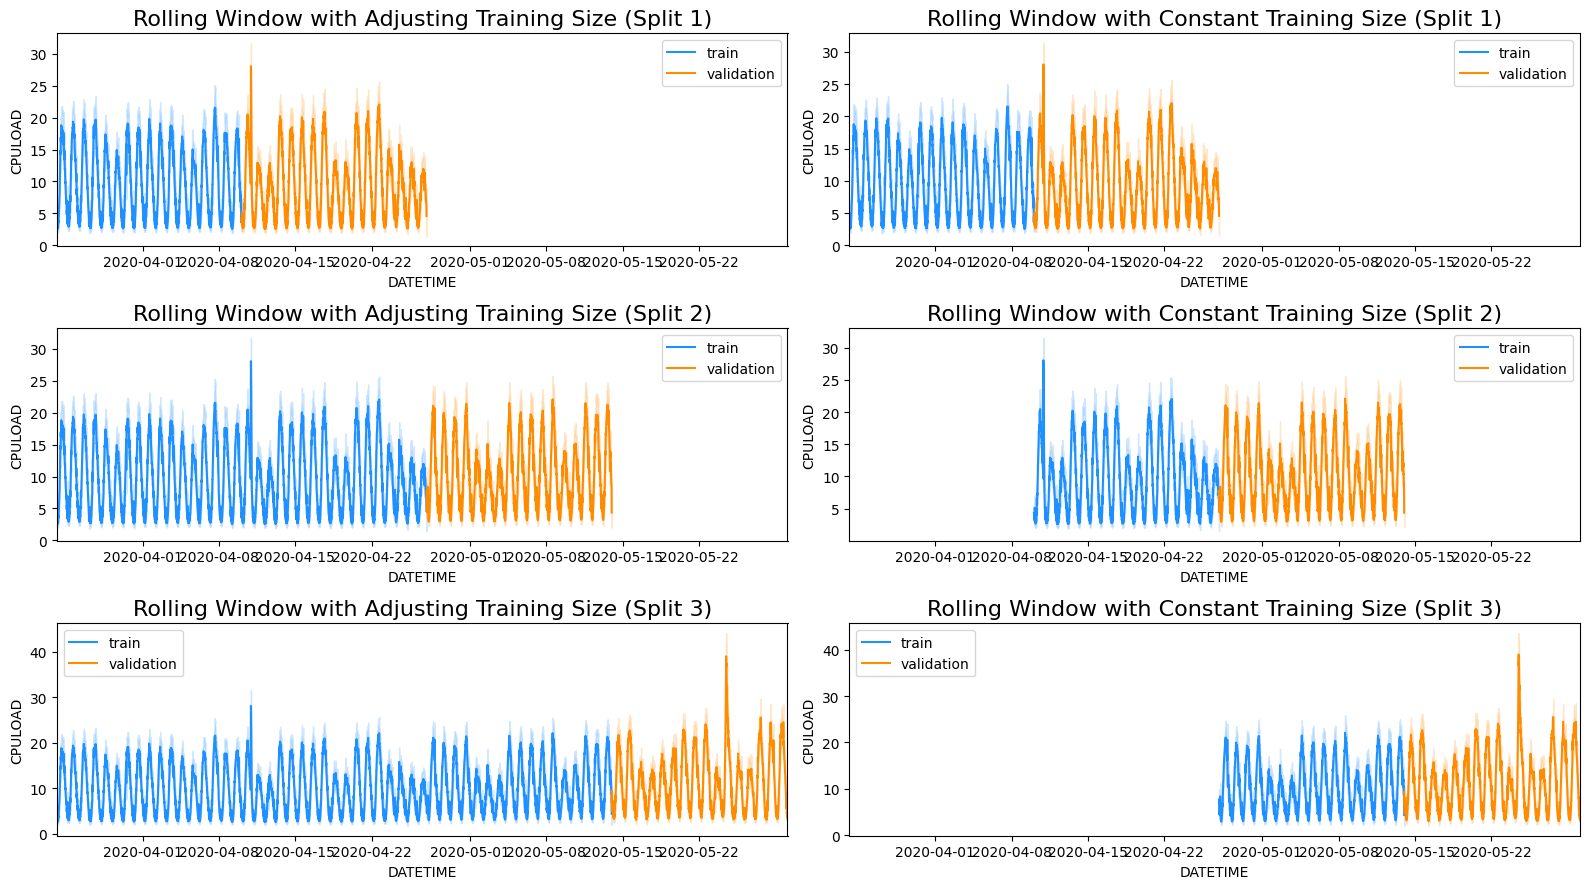

In [37]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

N_SPLITS = 3

# X ve y değişkenlerinin belirlenmesi
X = df_v2.index
y = df_v2['CPULOAD']

# Zaman serisi çapraz doğrulama
folds = TimeSeriesSplit(n_splits=N_SPLITS)

f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[-len(X_valid):], 
                 y= y_train[-len(X_valid):], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2020, 3, 24), date(2020, 5, 30)])
    ax[i, 1].set_xlim([date(2020, 3, 24), date(2020, 5, 30)])

plt.tight_layout()
plt.show()


In [56]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pandas as pd

# Sunucuların isimlerini al
servers = df_v2['SERVER'].unique()

# Her bir sunucu için
for server in servers:
    # Sunucuya özgü verileri al
    df_server = df_v2[df_v2['SERVER'] == server]

    # Sunucudaki her bir CPU için
    for cpu in df_server['CPU'].unique():
        # CPU'ya özgü verileri al
        df_cpu = df_server[df_server['CPU'] == cpu]

        # CPULOAD değerlerini ayarla
        df_avg = df_cpu['CPULOAD']

        # Verilerin frekansını 15 dakikalık olarak ayarla
        df_avg = df_avg.asfreq('15T')

        # Tarihler üzerinde döngü
        for date in pd.date_range(start=df_avg.index.min(), end=df_avg.index.max()-pd.Timedelta(days=1)):
            # Eğitim ve test veri setlerini belirleme
            train_data = df_avg[df_avg.index <= date]
            test_data = df_avg[df_avg.index == date + pd.Timedelta(days=1)]

            # ARIMA modeli uygulama
            model = ARIMA(train_data, order=(1,1,1))
            model_fit = model.fit()

            # Tahmin yapma
            forecast = model_fit.forecast(steps=len(test_data))

            # Tahminleri ve hata metriklerini saklama
            print(f"Server: {server}, CPU: {cpu}, Date: {date}, Forecast: {forecast}")


Server: CIHAZ_301, CPU: CPU-0, Date: 2020-03-24 00:00:00+03:00, Forecast: 2020-03-24 00:15:00+03:00    3.88
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-03-25 00:00:00+03:00, Forecast: 2020-03-25 00:15:00+03:00    5.191509
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-03-26 00:00:00+03:00, Forecast: 2020-03-26 00:15:00+03:00    4.57622
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-03-27 00:00:00+03:00, Forecast: 2020-03-27 00:15:00+03:00    8.114661
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-03-28 00:00:00+03:00, Forecast: 2020-03-28 00:15:00+03:00    4.274881
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-03-29 00:00:00+03:00, Forecast: 2020-03-29 00:15:00+03:00    3.900176
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-03-30 00:00:00+03:00, Forecast: 2020-03-30 00:15:00+03:00    5.314279
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 20

Server: CIHAZ_301, CPU: CPU-0, Date: 2020-05-23 00:00:00+03:00, Forecast: 2020-05-23 00:15:00+03:00    18.024579
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-05-24 00:00:00+03:00, Forecast: 2020-05-24 00:15:00+03:00    12.502391
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-05-25 00:00:00+03:00, Forecast: 2020-05-25 00:15:00+03:00    7.538332
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-05-26 00:00:00+03:00, Forecast: 2020-05-26 00:15:00+03:00    4.653168
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-05-27 00:00:00+03:00, Forecast: 2020-05-27 00:15:00+03:00    5.739088
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-05-28 00:00:00+03:00, Forecast: 2020-05-28 00:15:00+03:00    7.860216
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-0, Date: 2020-05-29 00:00:00+03:00, Forecast: 2020-05-29 00:15:00+03:00    10.754391
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, 

Server: CIHAZ_301, CPU: CPU-1, Date: 2020-05-16 00:00:00+03:00, Forecast: 2020-05-16 00:15:00+03:00    7.00632
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, Date: 2020-05-17 00:00:00+03:00, Forecast: 2020-05-17 00:15:00+03:00    6.596832
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, Date: 2020-05-18 00:00:00+03:00, Forecast: 2020-05-18 00:15:00+03:00    16.523882
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, Date: 2020-05-19 00:00:00+03:00, Forecast: 2020-05-19 00:15:00+03:00    20.030514
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, Date: 2020-05-20 00:00:00+03:00, Forecast: 2020-05-20 00:15:00+03:00    18.514963
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, Date: 2020-05-21 00:00:00+03:00, Forecast: 2020-05-21 00:15:00+03:00    9.86602
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, Date: 2020-05-22 00:00:00+03:00, Forecast: 2020-05-22 00:15:00+03:00    11.977191
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1, D

Server: CIHAZ_301, CPU: CPU-10, Date: 2020-05-08 00:00:00+03:00, Forecast: 2020-05-08 00:15:00+03:00    9.219881
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-10, Date: 2020-05-09 00:00:00+03:00, Forecast: 2020-05-09 00:15:00+03:00    9.574683
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-10, Date: 2020-05-10 00:00:00+03:00, Forecast: 2020-05-10 00:15:00+03:00    8.628954
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-10, Date: 2020-05-11 00:00:00+03:00, Forecast: 2020-05-11 00:15:00+03:00    5.67706
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-10, Date: 2020-05-12 00:00:00+03:00, Forecast: 2020-05-12 00:15:00+03:00    18.37515
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-10, Date: 2020-05-13 00:00:00+03:00, Forecast: 2020-05-13 00:15:00+03:00    8.257272
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-10, Date: 2020-05-14 00:00:00+03:00, Forecast: 2020-05-14 00:15:00+03:00    9.297999
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-

Server: CIHAZ_301, CPU: CPU-11, Date: 2020-04-30 00:00:00+03:00, Forecast: 2020-04-30 00:15:00+03:00    3.980795
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-11, Date: 2020-05-01 00:00:00+03:00, Forecast: 2020-05-01 00:15:00+03:00    5.764607
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-11, Date: 2020-05-02 00:00:00+03:00, Forecast: 2020-05-02 00:15:00+03:00    10.104921
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-11, Date: 2020-05-03 00:00:00+03:00, Forecast: 2020-05-03 00:15:00+03:00    6.363798
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-11, Date: 2020-05-04 00:00:00+03:00, Forecast: 2020-05-04 00:15:00+03:00    11.991259
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-11, Date: 2020-05-05 00:00:00+03:00, Forecast: 2020-05-05 00:15:00+03:00    5.883739
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-11, Date: 2020-05-06 00:00:00+03:00, Forecast: 2020-05-06 00:15:00+03:00    14.184012
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: 

Server: CIHAZ_301, CPU: CPU-12, Date: 2020-04-23 00:00:00+03:00, Forecast: 2020-04-23 00:15:00+03:00    0.693476
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-12, Date: 2020-04-24 00:00:00+03:00, Forecast: 2020-04-24 00:15:00+03:00    1.359701
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-12, Date: 2020-04-25 00:00:00+03:00, Forecast: 2020-04-25 00:15:00+03:00    1.269622
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-12, Date: 2020-04-26 00:00:00+03:00, Forecast: 2020-04-26 00:15:00+03:00    0.721513
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-12, Date: 2020-04-27 00:00:00+03:00, Forecast: 2020-04-27 00:15:00+03:00    1.120752
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-12, Date: 2020-04-28 00:00:00+03:00, Forecast: 2020-04-28 00:15:00+03:00    6.258483
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-12, Date: 2020-04-29 00:00:00+03:00, Forecast: 2020-04-29 00:15:00+03:00    1.611409
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU

Server: CIHAZ_301, CPU: CPU-13, Date: 2020-04-17 00:00:00+03:00, Forecast: 2020-04-17 00:15:00+03:00    1.366904
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-13, Date: 2020-04-18 00:00:00+03:00, Forecast: 2020-04-18 00:15:00+03:00    2.278362
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-13, Date: 2020-04-19 00:00:00+03:00, Forecast: 2020-04-19 00:15:00+03:00    2.000683
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-13, Date: 2020-04-20 00:00:00+03:00, Forecast: 2020-04-20 00:15:00+03:00    2.059808
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-13, Date: 2020-04-21 00:00:00+03:00, Forecast: 2020-04-21 00:15:00+03:00    1.026849
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-13, Date: 2020-04-22 00:00:00+03:00, Forecast: 2020-04-22 00:15:00+03:00    1.087668
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-13, Date: 2020-04-23 00:00:00+03:00, Forecast: 2020-04-23 00:15:00+03:00    1.053918
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU

Server: CIHAZ_301, CPU: CPU-14, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    4.157355
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-14, Date: 2020-04-12 00:00:00+03:00, Forecast: 2020-04-12 00:15:00+03:00    1.339709
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-14, Date: 2020-04-13 00:00:00+03:00, Forecast: 2020-04-13 00:15:00+03:00    1.726515
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-14, Date: 2020-04-14 00:00:00+03:00, Forecast: 2020-04-14 00:15:00+03:00    1.351705
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-14, Date: 2020-04-15 00:00:00+03:00, Forecast: 2020-04-15 00:15:00+03:00    0.958768
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-14, Date: 2020-04-16 00:00:00+03:00, Forecast: 2020-04-16 00:15:00+03:00    1.47349
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-14, Date: 2020-04-17 00:00:00+03:00, Forecast: 2020-04-17 00:15:00+03:00    0.849213
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-

Server: CIHAZ_301, CPU: CPU-15, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    0.684545
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-15, Date: 2020-04-06 00:00:00+03:00, Forecast: 2020-04-06 00:15:00+03:00    0.652574
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-15, Date: 2020-04-07 00:00:00+03:00, Forecast: 2020-04-07 00:15:00+03:00    0.963043
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-15, Date: 2020-04-08 00:00:00+03:00, Forecast: 2020-04-08 00:15:00+03:00    0.871192
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-15, Date: 2020-04-09 00:00:00+03:00, Forecast: 2020-04-09 00:15:00+03:00    0.814418
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-15, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    1.848724
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-15, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    4.027901
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU

Server: CIHAZ_301, CPU: CPU-16, Date: 2020-03-30 00:00:00+03:00, Forecast: 2020-03-30 00:15:00+03:00    0.740835
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-16, Date: 2020-03-31 00:00:00+03:00, Forecast: 2020-03-31 00:15:00+03:00    1.251409
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-16, Date: 2020-04-01 00:00:00+03:00, Forecast: 2020-04-01 00:15:00+03:00    1.454924
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-16, Date: 2020-04-02 00:00:00+03:00, Forecast: 2020-04-02 00:15:00+03:00    0.601331
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-16, Date: 2020-04-03 00:00:00+03:00, Forecast: 2020-04-03 00:15:00+03:00    1.317374
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-16, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    0.718317
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-16, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    0.6339
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-1

Server: CIHAZ_301, CPU: CPU-16, Date: 2020-05-28 00:00:00+03:00, Forecast: 2020-05-28 00:15:00+03:00    1.787588
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-16, Date: 2020-05-29 00:00:00+03:00, Forecast: 2020-05-29 00:15:00+03:00    1.300449
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-03-24 00:00:00+03:00, Forecast: 2020-03-24 00:15:00+03:00    0.36
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-03-25 00:00:00+03:00, Forecast: 2020-03-25 00:15:00+03:00    0.835358
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-03-26 00:00:00+03:00, Forecast: 2020-03-26 00:15:00+03:00    1.154025
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-03-27 00:00:00+03:00, Forecast: 2020-03-27 00:15:00+03:00    0.540957
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-03-28 00:00:00+03:00, Forecast: 2020-03-28 00:15:00+03:00    0.762617
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17,

Server: CIHAZ_301, CPU: CPU-17, Date: 2020-05-21 00:00:00+03:00, Forecast: 2020-05-21 00:15:00+03:00    1.956947
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-05-22 00:00:00+03:00, Forecast: 2020-05-22 00:15:00+03:00    2.217406
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-05-23 00:00:00+03:00, Forecast: 2020-05-23 00:15:00+03:00    2.248008
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-05-24 00:00:00+03:00, Forecast: 2020-05-24 00:15:00+03:00    1.618213
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-05-25 00:00:00+03:00, Forecast: 2020-05-25 00:15:00+03:00    0.802
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-05-26 00:00:00+03:00, Forecast: 2020-05-26 00:15:00+03:00    1.053045
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17, Date: 2020-05-27 00:00:00+03:00, Forecast: 2020-05-27 00:15:00+03:00    0.96392
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-17,

Server: CIHAZ_301, CPU: CPU-18, Date: 2020-05-15 00:00:00+03:00, Forecast: 2020-05-15 00:15:00+03:00    0.577307
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-18, Date: 2020-05-16 00:00:00+03:00, Forecast: 2020-05-16 00:15:00+03:00    0.973032
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-18, Date: 2020-05-17 00:00:00+03:00, Forecast: 2020-05-17 00:15:00+03:00    1.431894
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-18, Date: 2020-05-18 00:00:00+03:00, Forecast: 2020-05-18 00:15:00+03:00    1.477711
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-18, Date: 2020-05-19 00:00:00+03:00, Forecast: 2020-05-19 00:15:00+03:00    1.360271
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-18, Date: 2020-05-20 00:00:00+03:00, Forecast: 2020-05-20 00:15:00+03:00    1.062109
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-18, Date: 2020-05-21 00:00:00+03:00, Forecast: 2020-05-21 00:15:00+03:00    1.336639
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU

Server: CIHAZ_301, CPU: CPU-19, Date: 2020-05-08 00:00:00+03:00, Forecast: 2020-05-08 00:15:00+03:00    1.274001
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-19, Date: 2020-05-09 00:00:00+03:00, Forecast: 2020-05-09 00:15:00+03:00    1.065662
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-19, Date: 2020-05-10 00:00:00+03:00, Forecast: 2020-05-10 00:15:00+03:00    1.135252
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-19, Date: 2020-05-11 00:00:00+03:00, Forecast: 2020-05-11 00:15:00+03:00    1.028613
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-19, Date: 2020-05-12 00:00:00+03:00, Forecast: 2020-05-12 00:15:00+03:00    2.012781
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-19, Date: 2020-05-13 00:00:00+03:00, Forecast: 2020-05-13 00:15:00+03:00    2.651997
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-19, Date: 2020-05-14 00:00:00+03:00, Forecast: 2020-05-14 00:15:00+03:00    1.094993
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU

Server: CIHAZ_301, CPU: CPU-2, Date: 2020-05-01 00:00:00+03:00, Forecast: 2020-05-01 00:15:00+03:00    10.055507
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-2, Date: 2020-05-02 00:00:00+03:00, Forecast: 2020-05-02 00:15:00+03:00    4.067135
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-2, Date: 2020-05-03 00:00:00+03:00, Forecast: 2020-05-03 00:15:00+03:00    5.402127
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-2, Date: 2020-05-04 00:00:00+03:00, Forecast: 2020-05-04 00:15:00+03:00    16.804851
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-2, Date: 2020-05-05 00:00:00+03:00, Forecast: 2020-05-05 00:15:00+03:00    16.938634
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-2, Date: 2020-05-06 00:00:00+03:00, Forecast: 2020-05-06 00:15:00+03:00    15.086379
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-2, Date: 2020-05-07 00:00:00+03:00, Forecast: 2020-05-07 00:15:00+03:00    17.791084
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-2

Server: CIHAZ_301, CPU: CPU-20, Date: 2020-04-25 00:00:00+03:00, Forecast: 2020-04-25 00:15:00+03:00    1.065545
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-20, Date: 2020-04-26 00:00:00+03:00, Forecast: 2020-04-26 00:15:00+03:00    0.676635
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-20, Date: 2020-04-27 00:00:00+03:00, Forecast: 2020-04-27 00:15:00+03:00    0.654492
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-20, Date: 2020-04-28 00:00:00+03:00, Forecast: 2020-04-28 00:15:00+03:00    0.704286
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-20, Date: 2020-04-29 00:00:00+03:00, Forecast: 2020-04-29 00:15:00+03:00    0.553751
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-20, Date: 2020-04-30 00:00:00+03:00, Forecast: 2020-04-30 00:15:00+03:00    0.567188
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-20, Date: 2020-05-01 00:00:00+03:00, Forecast: 2020-05-01 00:15:00+03:00    0.74593
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-

Server: CIHAZ_301, CPU: CPU-21, Date: 2020-04-17 00:00:00+03:00, Forecast: 2020-04-17 00:15:00+03:00    1.731612
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-21, Date: 2020-04-18 00:00:00+03:00, Forecast: 2020-04-18 00:15:00+03:00    0.720224
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-21, Date: 2020-04-19 00:00:00+03:00, Forecast: 2020-04-19 00:15:00+03:00    0.644786
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-21, Date: 2020-04-20 00:00:00+03:00, Forecast: 2020-04-20 00:15:00+03:00    0.792613
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-21, Date: 2020-04-21 00:00:00+03:00, Forecast: 2020-04-21 00:15:00+03:00    1.255779
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-21, Date: 2020-04-22 00:00:00+03:00, Forecast: 2020-04-22 00:15:00+03:00    1.014901
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-21, Date: 2020-04-23 00:00:00+03:00, Forecast: 2020-04-23 00:15:00+03:00    2.001403
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU

Server: CIHAZ_301, CPU: CPU-22, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    1.2254
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-22, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    2.615581
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-22, Date: 2020-04-12 00:00:00+03:00, Forecast: 2020-04-12 00:15:00+03:00    0.797075
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-22, Date: 2020-04-13 00:00:00+03:00, Forecast: 2020-04-13 00:15:00+03:00    0.592347
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-22, Date: 2020-04-14 00:00:00+03:00, Forecast: 2020-04-14 00:15:00+03:00    0.798543
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-22, Date: 2020-04-15 00:00:00+03:00, Forecast: 2020-04-15 00:15:00+03:00    0.469306
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-22, Date: 2020-04-16 00:00:00+03:00, Forecast: 2020-04-16 00:15:00+03:00    0.99535
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-22

Server: CIHAZ_301, CPU: CPU-23, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    1.442858
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-23, Date: 2020-04-06 00:00:00+03:00, Forecast: 2020-04-06 00:15:00+03:00    1.293665
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-23, Date: 2020-04-07 00:00:00+03:00, Forecast: 2020-04-07 00:15:00+03:00    0.903473
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-23, Date: 2020-04-08 00:00:00+03:00, Forecast: 2020-04-08 00:15:00+03:00    0.84779
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-23, Date: 2020-04-09 00:00:00+03:00, Forecast: 2020-04-09 00:15:00+03:00    0.501581
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-23, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    1.241361
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-23, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    2.242134
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-

Server: CIHAZ_301, CPU: CPU-3, Date: 2020-03-30 00:00:00+03:00, Forecast: 2020-03-30 00:15:00+03:00    9.231585
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-3, Date: 2020-03-31 00:00:00+03:00, Forecast: 2020-03-31 00:15:00+03:00    10.122782
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-3, Date: 2020-04-01 00:00:00+03:00, Forecast: 2020-04-01 00:15:00+03:00    5.402753
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-3, Date: 2020-04-02 00:00:00+03:00, Forecast: 2020-04-02 00:15:00+03:00    10.083686
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-3, Date: 2020-04-03 00:00:00+03:00, Forecast: 2020-04-03 00:15:00+03:00    5.887755
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-3, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    15.979766
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-3, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    14.054385
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-3,

Server: CIHAZ_301, CPU: CPU-3, Date: 2020-05-29 00:00:00+03:00, Forecast: 2020-05-29 00:15:00+03:00    14.476397
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-03-24 00:00:00+03:00, Forecast: 2020-03-24 00:15:00+03:00    6.48
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-03-25 00:00:00+03:00, Forecast: 2020-03-25 00:15:00+03:00    6.888334
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-03-26 00:00:00+03:00, Forecast: 2020-03-26 00:15:00+03:00    7.445395
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-03-27 00:00:00+03:00, Forecast: 2020-03-27 00:15:00+03:00    4.30903
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-03-28 00:00:00+03:00, Forecast: 2020-03-28 00:15:00+03:00    7.504454
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-03-29 00:00:00+03:00, Forecast: 2020-03-29 00:15:00+03:00    6.867834
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2

Server: CIHAZ_301, CPU: CPU-4, Date: 2020-05-23 00:00:00+03:00, Forecast: 2020-05-23 00:15:00+03:00    11.124405
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-05-24 00:00:00+03:00, Forecast: 2020-05-24 00:15:00+03:00    5.195321
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-05-25 00:00:00+03:00, Forecast: 2020-05-25 00:15:00+03:00    8.168354
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-05-26 00:00:00+03:00, Forecast: 2020-05-26 00:15:00+03:00    7.325956
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-05-27 00:00:00+03:00, Forecast: 2020-05-27 00:15:00+03:00    12.587747
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-05-28 00:00:00+03:00, Forecast: 2020-05-28 00:15:00+03:00    19.662906
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-4, Date: 2020-05-29 00:00:00+03:00, Forecast: 2020-05-29 00:15:00+03:00    7.429213
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, 

Server: CIHAZ_301, CPU: CPU-5, Date: 2020-05-16 00:00:00+03:00, Forecast: 2020-05-16 00:15:00+03:00    15.000105
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, Date: 2020-05-17 00:00:00+03:00, Forecast: 2020-05-17 00:15:00+03:00    19.17196
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, Date: 2020-05-18 00:00:00+03:00, Forecast: 2020-05-18 00:15:00+03:00    6.188938
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, Date: 2020-05-19 00:00:00+03:00, Forecast: 2020-05-19 00:15:00+03:00    5.159472
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, Date: 2020-05-20 00:00:00+03:00, Forecast: 2020-05-20 00:15:00+03:00    7.937205
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, Date: 2020-05-21 00:00:00+03:00, Forecast: 2020-05-21 00:15:00+03:00    6.874534
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, Date: 2020-05-22 00:00:00+03:00, Forecast: 2020-05-22 00:15:00+03:00    8.13268
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-5, Dat

Server: CIHAZ_301, CPU: CPU-6, Date: 2020-05-10 00:00:00+03:00, Forecast: 2020-05-10 00:15:00+03:00    4.509209
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-6, Date: 2020-05-11 00:00:00+03:00, Forecast: 2020-05-11 00:15:00+03:00    16.014589
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-6, Date: 2020-05-12 00:00:00+03:00, Forecast: 2020-05-12 00:15:00+03:00    6.92492
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-6, Date: 2020-05-13 00:00:00+03:00, Forecast: 2020-05-13 00:15:00+03:00    4.777138
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-6, Date: 2020-05-14 00:00:00+03:00, Forecast: 2020-05-14 00:15:00+03:00    4.746214
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-6, Date: 2020-05-15 00:00:00+03:00, Forecast: 2020-05-15 00:15:00+03:00    20.996448
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-6, Date: 2020-05-16 00:00:00+03:00, Forecast: 2020-05-16 00:15:00+03:00    5.832785
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-6, Da

Server: CIHAZ_301, CPU: CPU-7, Date: 2020-05-03 00:00:00+03:00, Forecast: 2020-05-03 00:15:00+03:00    3.818682
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-7, Date: 2020-05-04 00:00:00+03:00, Forecast: 2020-05-04 00:15:00+03:00    5.062872
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-7, Date: 2020-05-05 00:00:00+03:00, Forecast: 2020-05-05 00:15:00+03:00    16.398463
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-7, Date: 2020-05-06 00:00:00+03:00, Forecast: 2020-05-06 00:15:00+03:00    16.915265
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-7, Date: 2020-05-07 00:00:00+03:00, Forecast: 2020-05-07 00:15:00+03:00    14.263458
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-7, Date: 2020-05-08 00:00:00+03:00, Forecast: 2020-05-08 00:15:00+03:00    5.782604
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-7, Date: 2020-05-09 00:00:00+03:00, Forecast: 2020-05-09 00:15:00+03:00    17.397508
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-7,

Server: CIHAZ_301, CPU: CPU-8, Date: 2020-04-27 00:00:00+03:00, Forecast: 2020-04-27 00:15:00+03:00    11.812607
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-8, Date: 2020-04-28 00:00:00+03:00, Forecast: 2020-04-28 00:15:00+03:00    13.188561
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-8, Date: 2020-04-29 00:00:00+03:00, Forecast: 2020-04-29 00:15:00+03:00    18.128249
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-8, Date: 2020-04-30 00:00:00+03:00, Forecast: 2020-04-30 00:15:00+03:00    17.906378
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-8, Date: 2020-05-01 00:00:00+03:00, Forecast: 2020-05-01 00:15:00+03:00    20.463196
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-8, Date: 2020-05-02 00:00:00+03:00, Forecast: 2020-05-02 00:15:00+03:00    3.893099
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-8, Date: 2020-05-03 00:00:00+03:00, Forecast: 2020-05-03 00:15:00+03:00    9.540786
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-8

Server: CIHAZ_301, CPU: CPU-9, Date: 2020-04-20 00:00:00+03:00, Forecast: 2020-04-20 00:15:00+03:00    12.359502
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-9, Date: 2020-04-21 00:00:00+03:00, Forecast: 2020-04-21 00:15:00+03:00    15.418217
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-9, Date: 2020-04-22 00:00:00+03:00, Forecast: 2020-04-22 00:15:00+03:00    10.918931
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-9, Date: 2020-04-23 00:00:00+03:00, Forecast: 2020-04-23 00:15:00+03:00    14.816581
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-9, Date: 2020-04-24 00:00:00+03:00, Forecast: 2020-04-24 00:15:00+03:00    11.168475
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-9, Date: 2020-04-25 00:00:00+03:00, Forecast: 2020-04-25 00:15:00+03:00    11.707724
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-9, Date: 2020-04-26 00:00:00+03:00, Forecast: 2020-04-26 00:15:00+03:00    5.990412
Freq: 15T, dtype: float64
Server: CIHAZ_301, CPU: CPU-

Server: CIHAZ_305, CPU: CPU-0, Date: 2020-04-13 00:00:00+03:00, Forecast: 2020-04-13 00:15:00+03:00    12.30252
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-0, Date: 2020-04-14 00:00:00+03:00, Forecast: 2020-04-14 00:15:00+03:00    13.40143
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-0, Date: 2020-04-15 00:00:00+03:00, Forecast: 2020-04-15 00:15:00+03:00    12.583042
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-0, Date: 2020-04-16 00:00:00+03:00, Forecast: 2020-04-16 00:15:00+03:00    12.587779
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-0, Date: 2020-04-17 00:00:00+03:00, Forecast: 2020-04-17 00:15:00+03:00    11.871285
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-0, Date: 2020-04-18 00:00:00+03:00, Forecast: 2020-04-18 00:15:00+03:00    13.402414
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-0, Date: 2020-04-19 00:00:00+03:00, Forecast: 2020-04-19 00:15:00+03:00    11.391919
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-0

Server: CIHAZ_305, CPU: CPU-1, Date: 2020-04-09 00:00:00+03:00, Forecast: 2020-04-09 00:15:00+03:00    15.093852
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    13.232545
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    22.837692
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1, Date: 2020-04-12 00:00:00+03:00, Forecast: 2020-04-12 00:15:00+03:00    15.48551
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1, Date: 2020-04-13 00:00:00+03:00, Forecast: 2020-04-13 00:15:00+03:00    13.855988
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1, Date: 2020-04-14 00:00:00+03:00, Forecast: 2020-04-14 00:15:00+03:00    12.77049
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1, Date: 2020-04-15 00:00:00+03:00, Forecast: 2020-04-15 00:15:00+03:00    12.969853
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1

Server: CIHAZ_305, CPU: CPU-10, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    11.648108
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-10, Date: 2020-04-06 00:00:00+03:00, Forecast: 2020-04-06 00:15:00+03:00    12.426778
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-10, Date: 2020-04-07 00:00:00+03:00, Forecast: 2020-04-07 00:15:00+03:00    17.482166
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-10, Date: 2020-04-08 00:00:00+03:00, Forecast: 2020-04-08 00:15:00+03:00    11.911642
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-10, Date: 2020-04-09 00:00:00+03:00, Forecast: 2020-04-09 00:15:00+03:00    10.789386
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-10, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    13.542734
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-10, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    19.305184
Freq: 15T, dtype: float64
Server: CIHAZ_305, C

Server: CIHAZ_305, CPU: CPU-11, Date: 2020-03-30 00:00:00+03:00, Forecast: 2020-03-30 00:15:00+03:00    10.947339
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-11, Date: 2020-03-31 00:00:00+03:00, Forecast: 2020-03-31 00:15:00+03:00    11.921916
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-11, Date: 2020-04-01 00:00:00+03:00, Forecast: 2020-04-01 00:15:00+03:00    12.219066
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-11, Date: 2020-04-02 00:00:00+03:00, Forecast: 2020-04-02 00:15:00+03:00    11.900329
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-11, Date: 2020-04-03 00:00:00+03:00, Forecast: 2020-04-03 00:15:00+03:00    11.447488
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-11, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    12.893215
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-11, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    13.062782
Freq: 15T, dtype: float64
Server: CIHAZ_305, C

Server: CIHAZ_305, CPU: CPU-11, Date: 2020-05-29 00:00:00+03:00, Forecast: 2020-05-29 00:15:00+03:00    17.612795
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-03-24 00:00:00+03:00, Forecast: 2020-03-24 00:15:00+03:00    2.37
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-03-25 00:00:00+03:00, Forecast: 2020-03-25 00:15:00+03:00    2.486706
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-03-26 00:00:00+03:00, Forecast: 2020-03-26 00:15:00+03:00    2.549537
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-03-27 00:00:00+03:00, Forecast: 2020-03-27 00:15:00+03:00    2.710693
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-03-28 00:00:00+03:00, Forecast: 2020-03-28 00:15:00+03:00    2.810436
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-03-29 00:00:00+03:00, Forecast: 2020-03-29 00:15:00+03:00    2.347233
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12

Server: CIHAZ_305, CPU: CPU-12, Date: 2020-05-22 00:00:00+03:00, Forecast: 2020-05-22 00:15:00+03:00    3.950838
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-05-23 00:00:00+03:00, Forecast: 2020-05-23 00:15:00+03:00    6.771336
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-05-24 00:00:00+03:00, Forecast: 2020-05-24 00:15:00+03:00    3.122212
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-05-25 00:00:00+03:00, Forecast: 2020-05-25 00:15:00+03:00    3.250625
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-05-26 00:00:00+03:00, Forecast: 2020-05-26 00:15:00+03:00    2.660263
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-05-27 00:00:00+03:00, Forecast: 2020-05-27 00:15:00+03:00    3.278124
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-12, Date: 2020-05-28 00:00:00+03:00, Forecast: 2020-05-28 00:15:00+03:00    4.662658
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU

Server: CIHAZ_305, CPU: CPU-13, Date: 2020-05-16 00:00:00+03:00, Forecast: 2020-05-16 00:15:00+03:00    5.447084
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-13, Date: 2020-05-17 00:00:00+03:00, Forecast: 2020-05-17 00:15:00+03:00    3.487404
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-13, Date: 2020-05-18 00:00:00+03:00, Forecast: 2020-05-18 00:15:00+03:00    4.193224
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-13, Date: 2020-05-19 00:00:00+03:00, Forecast: 2020-05-19 00:15:00+03:00    3.667151
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-13, Date: 2020-05-20 00:00:00+03:00, Forecast: 2020-05-20 00:15:00+03:00    4.899636
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-13, Date: 2020-05-21 00:00:00+03:00, Forecast: 2020-05-21 00:15:00+03:00    4.423334
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-13, Date: 2020-05-22 00:00:00+03:00, Forecast: 2020-05-22 00:15:00+03:00    4.532608
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU

Server: CIHAZ_305, CPU: CPU-14, Date: 2020-05-09 00:00:00+03:00, Forecast: 2020-05-09 00:15:00+03:00    4.45566
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-14, Date: 2020-05-10 00:00:00+03:00, Forecast: 2020-05-10 00:15:00+03:00    3.622336
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-14, Date: 2020-05-11 00:00:00+03:00, Forecast: 2020-05-11 00:15:00+03:00    5.944208
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-14, Date: 2020-05-12 00:00:00+03:00, Forecast: 2020-05-12 00:15:00+03:00    4.214648
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-14, Date: 2020-05-13 00:00:00+03:00, Forecast: 2020-05-13 00:15:00+03:00    3.827019
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-14, Date: 2020-05-14 00:00:00+03:00, Forecast: 2020-05-14 00:15:00+03:00    3.661593
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-14, Date: 2020-05-15 00:00:00+03:00, Forecast: 2020-05-15 00:15:00+03:00    4.663461
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-

Server: CIHAZ_305, CPU: CPU-15, Date: 2020-05-02 00:00:00+03:00, Forecast: 2020-05-02 00:15:00+03:00    3.385247
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-15, Date: 2020-05-03 00:00:00+03:00, Forecast: 2020-05-03 00:15:00+03:00    3.592469
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-15, Date: 2020-05-04 00:00:00+03:00, Forecast: 2020-05-04 00:15:00+03:00    3.531639
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-15, Date: 2020-05-05 00:00:00+03:00, Forecast: 2020-05-05 00:15:00+03:00    3.813295
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-15, Date: 2020-05-06 00:00:00+03:00, Forecast: 2020-05-06 00:15:00+03:00    3.621012
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-15, Date: 2020-05-07 00:00:00+03:00, Forecast: 2020-05-07 00:15:00+03:00    3.828514
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-15, Date: 2020-05-08 00:00:00+03:00, Forecast: 2020-05-08 00:15:00+03:00    3.409606
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU

Server: CIHAZ_305, CPU: CPU-16, Date: 2020-04-26 00:00:00+03:00, Forecast: 2020-04-26 00:15:00+03:00    2.824995
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-16, Date: 2020-04-27 00:00:00+03:00, Forecast: 2020-04-27 00:15:00+03:00    3.035613
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-16, Date: 2020-04-28 00:00:00+03:00, Forecast: 2020-04-28 00:15:00+03:00    3.602988
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-16, Date: 2020-04-29 00:00:00+03:00, Forecast: 2020-04-29 00:15:00+03:00    3.069806
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-16, Date: 2020-04-30 00:00:00+03:00, Forecast: 2020-04-30 00:15:00+03:00    3.36212
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-16, Date: 2020-05-01 00:00:00+03:00, Forecast: 2020-05-01 00:15:00+03:00    4.015547
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-16, Date: 2020-05-02 00:00:00+03:00, Forecast: 2020-05-02 00:15:00+03:00    3.182603
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-

Server: CIHAZ_305, CPU: CPU-17, Date: 2020-04-21 00:00:00+03:00, Forecast: 2020-04-21 00:15:00+03:00    2.854034
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-17, Date: 2020-04-22 00:00:00+03:00, Forecast: 2020-04-22 00:15:00+03:00    2.762138
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-17, Date: 2020-04-23 00:00:00+03:00, Forecast: 2020-04-23 00:15:00+03:00    3.535632
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-17, Date: 2020-04-24 00:00:00+03:00, Forecast: 2020-04-24 00:15:00+03:00    2.67538
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-17, Date: 2020-04-25 00:00:00+03:00, Forecast: 2020-04-25 00:15:00+03:00    2.138919
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-17, Date: 2020-04-26 00:00:00+03:00, Forecast: 2020-04-26 00:15:00+03:00    2.671163
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-17, Date: 2020-04-27 00:00:00+03:00, Forecast: 2020-04-27 00:15:00+03:00    2.834251
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-

Server: CIHAZ_305, CPU: CPU-18, Date: 2020-04-16 00:00:00+03:00, Forecast: 2020-04-16 00:15:00+03:00    2.527147
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-18, Date: 2020-04-17 00:00:00+03:00, Forecast: 2020-04-17 00:15:00+03:00    2.872829
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-18, Date: 2020-04-18 00:00:00+03:00, Forecast: 2020-04-18 00:15:00+03:00    2.174659
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-18, Date: 2020-04-19 00:00:00+03:00, Forecast: 2020-04-19 00:15:00+03:00    2.51857
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-18, Date: 2020-04-20 00:00:00+03:00, Forecast: 2020-04-20 00:15:00+03:00    2.280463
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-18, Date: 2020-04-21 00:00:00+03:00, Forecast: 2020-04-21 00:15:00+03:00    2.361363
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-18, Date: 2020-04-22 00:00:00+03:00, Forecast: 2020-04-22 00:15:00+03:00    2.41835
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1

Server: CIHAZ_305, CPU: CPU-19, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    3.436079
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-19, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    5.0073
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-19, Date: 2020-04-12 00:00:00+03:00, Forecast: 2020-04-12 00:15:00+03:00    2.357093
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-19, Date: 2020-04-13 00:00:00+03:00, Forecast: 2020-04-13 00:15:00+03:00    3.494022
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-19, Date: 2020-04-14 00:00:00+03:00, Forecast: 2020-04-14 00:15:00+03:00    2.997766
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-19, Date: 2020-04-15 00:00:00+03:00, Forecast: 2020-04-15 00:15:00+03:00    2.861034
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-19, Date: 2020-04-16 00:00:00+03:00, Forecast: 2020-04-16 00:15:00+03:00    2.880315
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-1

Server: CIHAZ_305, CPU: CPU-2, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    12.616351
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    11.846308
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2, Date: 2020-04-06 00:00:00+03:00, Forecast: 2020-04-06 00:15:00+03:00    11.99864
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2, Date: 2020-04-07 00:00:00+03:00, Forecast: 2020-04-07 00:15:00+03:00    12.911378
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2, Date: 2020-04-08 00:00:00+03:00, Forecast: 2020-04-08 00:15:00+03:00    13.205477
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2, Date: 2020-04-09 00:00:00+03:00, Forecast: 2020-04-09 00:15:00+03:00    14.092355
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    9.945967
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2

Server: CIHAZ_305, CPU: CPU-20, Date: 2020-03-31 00:00:00+03:00, Forecast: 2020-03-31 00:15:00+03:00    2.314796
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-20, Date: 2020-04-01 00:00:00+03:00, Forecast: 2020-04-01 00:15:00+03:00    2.410515
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-20, Date: 2020-04-02 00:00:00+03:00, Forecast: 2020-04-02 00:15:00+03:00    2.53063
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-20, Date: 2020-04-03 00:00:00+03:00, Forecast: 2020-04-03 00:15:00+03:00    2.464206
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-20, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    3.38869
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-20, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    2.512474
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-20, Date: 2020-04-06 00:00:00+03:00, Forecast: 2020-04-06 00:15:00+03:00    2.426829
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-2

Server: CIHAZ_305, CPU: CPU-21, Date: 2020-03-30 00:00:00+03:00, Forecast: 2020-03-30 00:15:00+03:00    2.077898
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-21, Date: 2020-03-31 00:00:00+03:00, Forecast: 2020-03-31 00:15:00+03:00    2.332699
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-21, Date: 2020-04-01 00:00:00+03:00, Forecast: 2020-04-01 00:15:00+03:00    2.357883
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-21, Date: 2020-04-02 00:00:00+03:00, Forecast: 2020-04-02 00:15:00+03:00    2.326564
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-21, Date: 2020-04-03 00:00:00+03:00, Forecast: 2020-04-03 00:15:00+03:00    2.416128
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-21, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    2.923088
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-21, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    2.332553
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU

Server: CIHAZ_305, CPU: CPU-21, Date: 2020-05-28 00:00:00+03:00, Forecast: 2020-05-28 00:15:00+03:00    3.528714
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-21, Date: 2020-05-29 00:00:00+03:00, Forecast: 2020-05-29 00:15:00+03:00    3.599649
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-03-24 00:00:00+03:00, Forecast: 2020-03-24 00:15:00+03:00    2.11
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-03-25 00:00:00+03:00, Forecast: 2020-03-25 00:15:00+03:00    3.029693
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-03-26 00:00:00+03:00, Forecast: 2020-03-26 00:15:00+03:00    2.786399
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-03-27 00:00:00+03:00, Forecast: 2020-03-27 00:15:00+03:00    2.662994
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-03-28 00:00:00+03:00, Forecast: 2020-03-28 00:15:00+03:00    2.913863
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22,

Server: CIHAZ_305, CPU: CPU-22, Date: 2020-05-20 00:00:00+03:00, Forecast: 2020-05-20 00:15:00+03:00    4.198557
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-05-21 00:00:00+03:00, Forecast: 2020-05-21 00:15:00+03:00    4.727281
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-05-22 00:00:00+03:00, Forecast: 2020-05-22 00:15:00+03:00    4.198148
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-05-23 00:00:00+03:00, Forecast: 2020-05-23 00:15:00+03:00    4.420418
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-05-24 00:00:00+03:00, Forecast: 2020-05-24 00:15:00+03:00    3.743795
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-05-25 00:00:00+03:00, Forecast: 2020-05-25 00:15:00+03:00    3.013864
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-22, Date: 2020-05-26 00:00:00+03:00, Forecast: 2020-05-26 00:15:00+03:00    2.91087
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-

Server: CIHAZ_305, CPU: CPU-23, Date: 2020-05-12 00:00:00+03:00, Forecast: 2020-05-12 00:15:00+03:00    2.757175
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-23, Date: 2020-05-13 00:00:00+03:00, Forecast: 2020-05-13 00:15:00+03:00    3.821407
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-23, Date: 2020-05-14 00:00:00+03:00, Forecast: 2020-05-14 00:15:00+03:00    4.351131
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-23, Date: 2020-05-15 00:00:00+03:00, Forecast: 2020-05-15 00:15:00+03:00    4.273192
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-23, Date: 2020-05-16 00:00:00+03:00, Forecast: 2020-05-16 00:15:00+03:00    4.406329
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-23, Date: 2020-05-17 00:00:00+03:00, Forecast: 2020-05-17 00:15:00+03:00    3.595929
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-23, Date: 2020-05-18 00:00:00+03:00, Forecast: 2020-05-18 00:15:00+03:00    3.475899
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU

Server: CIHAZ_305, CPU: CPU-3, Date: 2020-05-05 00:00:00+03:00, Forecast: 2020-05-05 00:15:00+03:00    14.724299
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-3, Date: 2020-05-06 00:00:00+03:00, Forecast: 2020-05-06 00:15:00+03:00    15.247497
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-3, Date: 2020-05-07 00:00:00+03:00, Forecast: 2020-05-07 00:15:00+03:00    17.053773
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-3, Date: 2020-05-08 00:00:00+03:00, Forecast: 2020-05-08 00:15:00+03:00    13.497602
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-3, Date: 2020-05-09 00:00:00+03:00, Forecast: 2020-05-09 00:15:00+03:00    16.345399
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-3, Date: 2020-05-10 00:00:00+03:00, Forecast: 2020-05-10 00:15:00+03:00    14.427492
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-3, Date: 2020-05-11 00:00:00+03:00, Forecast: 2020-05-11 00:15:00+03:00    12.775836
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU

Server: CIHAZ_305, CPU: CPU-4, Date: 2020-04-28 00:00:00+03:00, Forecast: 2020-04-28 00:15:00+03:00    16.195505
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-4, Date: 2020-04-29 00:00:00+03:00, Forecast: 2020-04-29 00:15:00+03:00    13.602734
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-4, Date: 2020-04-30 00:00:00+03:00, Forecast: 2020-04-30 00:15:00+03:00    14.679216
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-4, Date: 2020-05-01 00:00:00+03:00, Forecast: 2020-05-01 00:15:00+03:00    15.868053
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-4, Date: 2020-05-02 00:00:00+03:00, Forecast: 2020-05-02 00:15:00+03:00    13.802757
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-4, Date: 2020-05-03 00:00:00+03:00, Forecast: 2020-05-03 00:15:00+03:00    14.961812
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-4, Date: 2020-05-04 00:00:00+03:00, Forecast: 2020-05-04 00:15:00+03:00    14.958187
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU

Server: CIHAZ_305, CPU: CPU-5, Date: 2020-04-22 00:00:00+03:00, Forecast: 2020-04-22 00:15:00+03:00    13.534967
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-5, Date: 2020-04-23 00:00:00+03:00, Forecast: 2020-04-23 00:15:00+03:00    15.101993
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-5, Date: 2020-04-24 00:00:00+03:00, Forecast: 2020-04-24 00:15:00+03:00    13.05939
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-5, Date: 2020-04-25 00:00:00+03:00, Forecast: 2020-04-25 00:15:00+03:00    12.235419
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-5, Date: 2020-04-26 00:00:00+03:00, Forecast: 2020-04-26 00:15:00+03:00    16.632306
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-5, Date: 2020-04-27 00:00:00+03:00, Forecast: 2020-04-27 00:15:00+03:00    14.980587
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-5, Date: 2020-04-28 00:00:00+03:00, Forecast: 2020-04-28 00:15:00+03:00    17.679655
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-

Server: CIHAZ_305, CPU: CPU-6, Date: 2020-04-15 00:00:00+03:00, Forecast: 2020-04-15 00:15:00+03:00    19.698581
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-6, Date: 2020-04-16 00:00:00+03:00, Forecast: 2020-04-16 00:15:00+03:00    12.435059
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-6, Date: 2020-04-17 00:00:00+03:00, Forecast: 2020-04-17 00:15:00+03:00    13.83681
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-6, Date: 2020-04-18 00:00:00+03:00, Forecast: 2020-04-18 00:15:00+03:00    14.07453
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-6, Date: 2020-04-19 00:00:00+03:00, Forecast: 2020-04-19 00:15:00+03:00    11.830326
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-6, Date: 2020-04-20 00:00:00+03:00, Forecast: 2020-04-20 00:15:00+03:00    12.951825
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-6, Date: 2020-04-21 00:00:00+03:00, Forecast: 2020-04-21 00:15:00+03:00    12.16979
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-6,

Server: CIHAZ_305, CPU: CPU-7, Date: 2020-04-10 00:00:00+03:00, Forecast: 2020-04-10 00:15:00+03:00    12.802207
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-7, Date: 2020-04-11 00:00:00+03:00, Forecast: 2020-04-11 00:15:00+03:00    21.273445
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-7, Date: 2020-04-12 00:00:00+03:00, Forecast: 2020-04-12 00:15:00+03:00    10.590484
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-7, Date: 2020-04-13 00:00:00+03:00, Forecast: 2020-04-13 00:15:00+03:00    14.79848
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-7, Date: 2020-04-14 00:00:00+03:00, Forecast: 2020-04-14 00:15:00+03:00    11.790305
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-7, Date: 2020-04-15 00:00:00+03:00, Forecast: 2020-04-15 00:15:00+03:00    13.013014
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-7, Date: 2020-04-16 00:00:00+03:00, Forecast: 2020-04-16 00:15:00+03:00    13.859972
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-

Server: CIHAZ_305, CPU: CPU-8, Date: 2020-04-03 00:00:00+03:00, Forecast: 2020-04-03 00:15:00+03:00    12.533658
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-8, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    14.169678
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-8, Date: 2020-04-05 00:00:00+03:00, Forecast: 2020-04-05 00:15:00+03:00    12.385719
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-8, Date: 2020-04-06 00:00:00+03:00, Forecast: 2020-04-06 00:15:00+03:00    11.930301
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-8, Date: 2020-04-07 00:00:00+03:00, Forecast: 2020-04-07 00:15:00+03:00    16.253765
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-8, Date: 2020-04-08 00:00:00+03:00, Forecast: 2020-04-08 00:15:00+03:00    12.906658
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-8, Date: 2020-04-09 00:00:00+03:00, Forecast: 2020-04-09 00:15:00+03:00    12.303
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-8,

Server: CIHAZ_305, CPU: CPU-9, Date: 2020-03-29 00:00:00+03:00, Forecast: 2020-03-29 00:15:00+03:00    13.54105
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9, Date: 2020-03-30 00:00:00+03:00, Forecast: 2020-03-30 00:15:00+03:00    11.145441
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9, Date: 2020-03-31 00:00:00+03:00, Forecast: 2020-03-31 00:15:00+03:00    10.823324
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9, Date: 2020-04-01 00:00:00+03:00, Forecast: 2020-04-01 00:15:00+03:00    12.23644
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9, Date: 2020-04-02 00:00:00+03:00, Forecast: 2020-04-02 00:15:00+03:00    11.759537
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9, Date: 2020-04-03 00:00:00+03:00, Forecast: 2020-04-03 00:15:00+03:00    12.069359
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9, Date: 2020-04-04 00:00:00+03:00, Forecast: 2020-04-04 00:15:00+03:00    13.456001
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9

Server: CIHAZ_305, CPU: CPU-9, Date: 2020-05-28 00:00:00+03:00, Forecast: 2020-05-28 00:15:00+03:00    13.065663
Freq: 15T, dtype: float64
Server: CIHAZ_305, CPU: CPU-9, Date: 2020-05-29 00:00:00+03:00, Forecast: 2020-05-29 00:15:00+03:00    15.520073
Freq: 15T, dtype: float64


In [59]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pandas as pd

# Sunucuların isimlerini al
servers = df_v2['SERVER'].unique()

# Hedef tarihi belirle
target_date = '2020-05-31'

# Tahminleri saklayacak boş bir liste oluştur
predictions = []

# Her bir sunucu için
for server in servers:
    # Sunucuya özgü verileri al
    df_server = df_v2[df_v2['SERVER'] == server]

    # Sunucudaki her bir CPU için
    for cpu in df_server['CPU'].unique():
        # CPU'ya özgü verileri al
        df_cpu = df_server[df_server['CPU'] == cpu]

        # CPULOAD değerlerini ayarla
        df_avg = df_cpu['CPULOAD']

        # Verilerin frekansını 15 dakikalık olarak ayarla
        df_avg = df_avg.asfreq('15T')

        # Eğitim veri setini belirleme
        train_data = df_avg[df_avg.index < target_date]
        
        # ARIMA modeli uygulama
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()

        # Hedef tarih için tahmin yapma
        forecast = model_fit.forecast(steps=1)

        # Tahmini saklama
        predictions.append({'SERVER': server, 'CPU': cpu, 'DATETIME': target_date, 'CPULOAD_PRED': forecast[0]})

# Tahminleri DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions)

# Tahminleri yazdırma
print(predictions_df)


       SERVER     CPU    DATETIME  CPULOAD_PRED
0   CIHAZ_301   CPU-0  2020-05-31      5.072133
1   CIHAZ_301   CPU-1  2020-05-31      5.509449
2   CIHAZ_301  CPU-10  2020-05-31     12.495807
3   CIHAZ_301  CPU-11  2020-05-31      7.603323
4   CIHAZ_301  CPU-12  2020-05-31      3.784768
5   CIHAZ_301  CPU-13  2020-05-31      3.009486
6   CIHAZ_301  CPU-14  2020-05-31      1.820459
7   CIHAZ_301  CPU-15  2020-05-31      1.315095
8   CIHAZ_301  CPU-16  2020-05-31      0.680637
9   CIHAZ_301  CPU-17  2020-05-31      0.771732
10  CIHAZ_301  CPU-18  2020-05-31      1.190371
11  CIHAZ_301  CPU-19  2020-05-31      2.228718
12  CIHAZ_301   CPU-2  2020-05-31     11.773482
13  CIHAZ_301  CPU-20  2020-05-31      1.943808
14  CIHAZ_301  CPU-21  2020-05-31      0.716291
15  CIHAZ_301  CPU-22  2020-05-31      0.918557
16  CIHAZ_301  CPU-23  2020-05-31      1.339488
17  CIHAZ_301   CPU-3  2020-05-31     19.476642
18  CIHAZ_301   CPU-4  2020-05-31     11.841581
19  CIHAZ_301   CPU-5  2020-05-31      7

In [89]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pandas as pd
from pytz import timezone

# Sunucuların isimlerini al
servers = df_v2['SERVER'].unique()

# Hedef tarihi belirle
target_date = pd.date_range('2020-05-31 00:00', '2020-05-31 23:45', freq='15T', tz='UTC')

# Tahminleri saklayacak boş bir liste oluştur
predictions = []

# Her bir sunucu için
for server in servers:
    # Sunucuya özgü verileri al
    df_server = df_v2[df_v2['SERVER'] == server]

    # Sunucudaki her bir CPU için
    for cpu in df_server['CPU'].unique():
        # CPU'ya özgü verileri al
        df_cpu = df_server[df_server['CPU'] == cpu]

        # CPULOAD değerlerini ayarla
        df_avg = df_cpu['CPULOAD']

        # Verilerin frekansını 15 dakikalık olarak ayarla
        df_avg = df_avg.asfreq('15T')

        # Eğitim veri setini belirleme
        train_data = df_avg[df_avg.index < target_date[0].tz_convert('UTC')]
        
        # ARIMA modeli uygulama
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()

        # Hedef tarih için tahmin yapma
        for date in target_date:
            forecast = model_fit.forecast(steps=1)

            # Tahmini saklama
            predictions.append({'SERVER': server, 'CPU': cpu, 'DATETIME': date, 'CPULOAD_PRED': forecast[0]})

# Tahminleri DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions)

# Tahminleri yazdırma
print(predictions_df)


         SERVER    CPU                  DATETIME  CPULOAD_PRED
0     CIHAZ_301  CPU-0 2020-05-31 00:00:00+00:00      5.072133
1     CIHAZ_301  CPU-0 2020-05-31 00:15:00+00:00      5.072133
2     CIHAZ_301  CPU-0 2020-05-31 00:30:00+00:00      5.072133
3     CIHAZ_301  CPU-0 2020-05-31 00:45:00+00:00      5.072133
4     CIHAZ_301  CPU-0 2020-05-31 01:00:00+00:00      5.072133
...         ...    ...                       ...           ...
4603  CIHAZ_305  CPU-9 2020-05-31 22:45:00+00:00     14.513393
4604  CIHAZ_305  CPU-9 2020-05-31 23:00:00+00:00     14.513393
4605  CIHAZ_305  CPU-9 2020-05-31 23:15:00+00:00     14.513393
4606  CIHAZ_305  CPU-9 2020-05-31 23:30:00+00:00     14.513393
4607  CIHAZ_305  CPU-9 2020-05-31 23:45:00+00:00     14.513393

[4608 rows x 4 columns]


In [87]:
predictions_df.head()

DATETIME  CPULOAD_PRED
0 2020-05-31 00:00:00+00:00      5.072133
1 2020-05-31 00:15:00+00:00      5.072133
2 2020-05-31 00:30:00+00:00      5.072133
3 2020-05-31 00:45:00+00:00      5.072133
4 2020-05-31 01:00:00+00:00      5.072133

In [64]:
# sample_submission.csv dosyasını oku
submission = pd.read_csv("data/sample_submission.csv")

# predictions_df'deki CPULOAD_PRED değerlerini submission DataFrame'ine yaz
submission['CPULOAD'] = predictions_df['CPULOAD_PRED'].values

# Güncellenmiş submission DataFrame'ini yazdır
print(submission)


      index    CPULOAD
0         0   5.072133
1         1   5.072133
2         2   5.072133
3         3   5.072133
4         4   5.072133
...     ...        ...
4603   4603  14.513393
4604   4604  14.513393
4605   4605  14.513393
4606   4606  14.513393
4607   4607  14.513393

[4608 rows x 2 columns]


In [65]:
submission.head()

index   CPULOAD
0      0  5.072133
1      1  5.072133
2      2  5.072133
3      3  5.072133
4      4  5.072133

In [68]:
submission.to_csv('C:\\Users\\fatih\\Desktop\\guncellenmis_submission.csv', index=False)


In [69]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pandas as pd
from pytz import timezone

# Sunucuların isimlerini al
servers = df_v2['SERVER'].unique()

# Hedef tarihi belirle
target_date = pd.date_range('2020-05-31 00:00', '2020-05-31 23:59', freq='15T', tz='UTC')

# Tahminleri saklayacak boş bir liste oluştur
predictions = []

# Her bir sunucu için
for server in servers:
    # Sunucuya özgü verileri al
    df_server = df_v2[df_v2['SERVER'] == server]

    # Sunucudaki her bir CPU için
    for cpu in df_server['CPU'].unique():
        # CPU'ya özgü verileri al
        df_cpu = df_server[df_server['CPU'] == cpu]

        # CPULOAD değerlerini ayarla
        df_avg = df_cpu['CPULOAD']

        # Verilerin frekansını 15 dakikalık olarak ayarla
        df_avg = df_avg.asfreq('15T')

        # Eğitim veri setini belirleme
        train_data = df_avg[df_avg.index < target_date[0].tz_convert('UTC')]
        
        # ARIMA modeli uygulama
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()

        # Hedef tarih için tahmin yapma
        for date in target_date:
            forecast = model_fit.forecast(steps=1)

            # Tahmini saklama
            predictions.append({'DATETIME': date, 'CPULOAD_PRED': forecast[0]})

# Tahminleri DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions)

# Tahminleri yazdırma
print(predictions_df)


                      DATETIME  CPULOAD_PRED
0    2020-05-31 00:00:00+00:00      5.072133
1    2020-05-31 00:15:00+00:00      5.072133
2    2020-05-31 00:30:00+00:00      5.072133
3    2020-05-31 00:45:00+00:00      5.072133
4    2020-05-31 01:00:00+00:00      5.072133
...                        ...           ...
4603 2020-05-31 22:45:00+00:00     14.513393
4604 2020-05-31 23:00:00+00:00     14.513393
4605 2020-05-31 23:15:00+00:00     14.513393
4606 2020-05-31 23:30:00+00:00     14.513393
4607 2020-05-31 23:45:00+00:00     14.513393

[4608 rows x 2 columns]
